In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\LN&T\\train.csv")
test=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\LN&T\\test.csv")

In [3]:
train.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   

       ...      SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0      ...                          0                     0   
1      ...                          0                     0   
2      ...                          0                     0   
3      ...                          0                     0   
4      ...                          0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 41 columns]

In [4]:
trainfeature=train
testfeature=test

In [5]:
trainfeature['Employment.Type'].fillna(trainfeature['Employment.Type'].mode()[0],inplace=True)
testfeature['Employment.Type'].fillna(testfeature['Employment.Type'].mode()[0],inplace=True)

In [6]:
trainfeature.drop("UniqueID",axis=1,inplace=True)
trainfeature.drop("Date.of.Birth",axis=1,inplace=True)

testfeature.drop("UniqueID",axis=1,inplace=True)
testfeature.drop("Date.of.Birth",axis=1,inplace=True)

In [7]:
def fetchAVERAGEACCTAGE(acctage):
    year=acctage.split()[0]
    month=acctage.split()[1]
    year=year[:-3]
    month=month[:-3]
    return year+"."+month

In [8]:
trainfeature['AVERAGE.ACCT.AGE']=trainfeature['AVERAGE.ACCT.AGE'].apply(fetchAVERAGEACCTAGE)
trainfeature['AVERAGE.ACCT.AGE']=trainfeature['AVERAGE.ACCT.AGE'].astype(str).astype(float)

testfeature['AVERAGE.ACCT.AGE']=testfeature['AVERAGE.ACCT.AGE'].apply(fetchAVERAGEACCTAGE)
testfeature['AVERAGE.ACCT.AGE']=testfeature['AVERAGE.ACCT.AGE'].astype(str).astype(float)

In [9]:
trainfeature['CREDIT.HISTORY.LENGTH']=trainfeature['CREDIT.HISTORY.LENGTH'].apply(fetchAVERAGEACCTAGE)
trainfeature['CREDIT.HISTORY.LENGTH']=trainfeature['CREDIT.HISTORY.LENGTH'].astype(str).astype(float)

testfeature['CREDIT.HISTORY.LENGTH']=testfeature['CREDIT.HISTORY.LENGTH'].apply(fetchAVERAGEACCTAGE)
testfeature['CREDIT.HISTORY.LENGTH']=testfeature['CREDIT.HISTORY.LENGTH'].astype(str).astype(float)

In [10]:
trainfeature.drop('DisbursalDate',axis=1,inplace=True)
testfeature.drop('DisbursalDate',axis=1,inplace=True)

In [11]:
trainfeature=pd.get_dummies(trainfeature,drop_first=True)
testfeature=pd.get_dummies(testfeature,drop_first=True)

In [12]:
trainfeature['disbursed_amount']=np.log(trainfeature['disbursed_amount'])
testfeature['disbursed_amount']=np.log(testfeature['disbursed_amount'])

In [13]:
trainfeature['asset_cost']=np.log(trainfeature['asset_cost'])
testfeature['asset_cost']=np.log(testfeature['asset_cost'])

In [14]:
trainfeature.loc[trainfeature['PRIMARY.INSTAL.AMT']>1,'PRIMARY.INSTAL.AMT']=1
testfeature.loc[testfeature['PRIMARY.INSTAL.AMT']>1,'PRIMARY.INSTAL.AMT']=1

In [15]:
trainfeature.loc[trainfeature['SEC.INSTAL.AMT']>1,'SEC.INSTAL.AMT']=1
testfeature.loc[testfeature['SEC.INSTAL.AMT']>1,'SEC.INSTAL.AMT']=1

In [16]:
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=0) & (trainfeature['PERFORM_CNS.SCORE']<200),'PERFORM_CNS.SCORE']=0
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=200) & (trainfeature['PERFORM_CNS.SCORE']<500),'PERFORM_CNS.SCORE']=1
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=500),'PERFORM_CNS.SCORE']=2

testfeature.loc[(testfeature['PERFORM_CNS.SCORE']>=0) & (testfeature['PERFORM_CNS.SCORE']<200),'PERFORM_CNS.SCORE']=0
testfeature.loc[(testfeature['PERFORM_CNS.SCORE']>=200) & (testfeature['PERFORM_CNS.SCORE']<500),'PERFORM_CNS.SCORE']=1
testfeature.loc[(testfeature['PERFORM_CNS.SCORE']>=500),'PERFORM_CNS.SCORE']=2

In [17]:
trainfeature['no of proofs']=trainfeature['Aadhar_flag'] + trainfeature['PAN_flag'] + trainfeature['VoterID_flag'] + trainfeature['Driving_flag'] + trainfeature['Passport_flag']
testfeature['no of proofs']=testfeature['Aadhar_flag'] + testfeature['PAN_flag'] + testfeature['VoterID_flag'] + testfeature['Driving_flag'] + testfeature['Passport_flag']

In [18]:

for i in trainfeature.columns:
    flag=0
    
    for j in testfeature.columns:
        if i==j:
            flag=1
    if flag==0:
        print(i)

loan_default
PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found


In [19]:
testfeature['PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found']=0

In [20]:
import catboost as cb
cat_ind1 = [3,4,5,6,7,8]
cat_rg1 = cb.CatBoostClassifier(iterations=625, learning_rate=0.06, depth=8, loss_function='Logloss', random_seed=2018)

In [28]:
cat_rg1.fit(X=trainfeature.drop('loan_default',axis=1), y=trainfeature['loan_default'], cat_features=cat_ind1, verbose=True)

0:	learn: 0.6696979	total: 557ms	remaining: 5m 47s
1:	learn: 0.6489374	total: 1.25s	remaining: 6m 28s
2:	learn: 0.6311534	total: 1.83s	remaining: 6m 20s
3:	learn: 0.6164138	total: 2.22s	remaining: 5m 45s
4:	learn: 0.6028605	total: 2.76s	remaining: 5m 42s
5:	learn: 0.5913153	total: 3.29s	remaining: 5m 39s
6:	learn: 0.5813273	total: 3.59s	remaining: 5m 17s
7:	learn: 0.5718213	total: 4.14s	remaining: 5m 19s
8:	learn: 0.5637170	total: 4.66s	remaining: 5m 18s
9:	learn: 0.5567850	total: 5.19s	remaining: 5m 19s
10:	learn: 0.5505906	total: 5.65s	remaining: 5m 15s
11:	learn: 0.5456410	total: 5.87s	remaining: 4m 59s
12:	learn: 0.5415711	total: 6.09s	remaining: 4m 46s
13:	learn: 0.5369515	total: 6.6s	remaining: 4m 48s
14:	learn: 0.5331523	total: 7.13s	remaining: 4m 49s
15:	learn: 0.5298777	total: 7.64s	remaining: 4m 50s
16:	learn: 0.5266044	total: 8.23s	remaining: 4m 54s
17:	learn: 0.5238586	total: 8.93s	remaining: 5m 1s
18:	learn: 0.5214857	total: 9.53s	remaining: 5m 3s
19:	learn: 0.5192905	tota

158:	learn: 0.4873277	total: 1m 29s	remaining: 4m 23s
159:	learn: 0.4872945	total: 1m 30s	remaining: 4m 22s
160:	learn: 0.4872309	total: 1m 30s	remaining: 4m 22s
161:	learn: 0.4871745	total: 1m 31s	remaining: 4m 21s
162:	learn: 0.4871122	total: 1m 32s	remaining: 4m 20s
163:	learn: 0.4870717	total: 1m 32s	remaining: 4m 20s
164:	learn: 0.4870345	total: 1m 33s	remaining: 4m 20s
165:	learn: 0.4869939	total: 1m 33s	remaining: 4m 19s
166:	learn: 0.4869561	total: 1m 34s	remaining: 4m 18s
167:	learn: 0.4869054	total: 1m 34s	remaining: 4m 18s
168:	learn: 0.4868465	total: 1m 35s	remaining: 4m 17s
169:	learn: 0.4868149	total: 1m 35s	remaining: 4m 16s
170:	learn: 0.4867846	total: 1m 36s	remaining: 4m 16s
171:	learn: 0.4867142	total: 1m 37s	remaining: 4m 15s
172:	learn: 0.4866425	total: 1m 37s	remaining: 4m 15s
173:	learn: 0.4866004	total: 1m 38s	remaining: 4m 14s
174:	learn: 0.4865792	total: 1m 38s	remaining: 4m 13s
175:	learn: 0.4865248	total: 1m 39s	remaining: 4m 13s
176:	learn: 0.4864704	total:

312:	learn: 0.4804113	total: 2m 55s	remaining: 2m 54s
313:	learn: 0.4803871	total: 2m 55s	remaining: 2m 54s
314:	learn: 0.4803598	total: 2m 56s	remaining: 2m 53s
315:	learn: 0.4803218	total: 2m 56s	remaining: 2m 52s
316:	learn: 0.4802800	total: 2m 57s	remaining: 2m 52s
317:	learn: 0.4802398	total: 2m 57s	remaining: 2m 51s
318:	learn: 0.4801822	total: 2m 58s	remaining: 2m 51s
319:	learn: 0.4801494	total: 2m 59s	remaining: 2m 50s
320:	learn: 0.4801066	total: 2m 59s	remaining: 2m 50s
321:	learn: 0.4800634	total: 3m	remaining: 2m 49s
322:	learn: 0.4800165	total: 3m	remaining: 2m 49s
323:	learn: 0.4799842	total: 3m 1s	remaining: 2m 48s
324:	learn: 0.4799608	total: 3m 2s	remaining: 2m 48s
325:	learn: 0.4799215	total: 3m 2s	remaining: 2m 47s
326:	learn: 0.4798696	total: 3m 3s	remaining: 2m 46s
327:	learn: 0.4798161	total: 3m 3s	remaining: 2m 46s
328:	learn: 0.4797993	total: 3m 4s	remaining: 2m 45s
329:	learn: 0.4797319	total: 3m 4s	remaining: 2m 45s
330:	learn: 0.4797067	total: 3m 5s	remainin

465:	learn: 0.4744436	total: 4m 21s	remaining: 1m 29s
466:	learn: 0.4743986	total: 4m 21s	remaining: 1m 28s
467:	learn: 0.4743569	total: 4m 22s	remaining: 1m 27s
468:	learn: 0.4743296	total: 4m 22s	remaining: 1m 27s
469:	learn: 0.4743075	total: 4m 23s	remaining: 1m 26s
470:	learn: 0.4742760	total: 4m 23s	remaining: 1m 26s
471:	learn: 0.4742503	total: 4m 24s	remaining: 1m 25s
472:	learn: 0.4742341	total: 4m 25s	remaining: 1m 25s
473:	learn: 0.4742015	total: 4m 25s	remaining: 1m 24s
474:	learn: 0.4741739	total: 4m 26s	remaining: 1m 24s
475:	learn: 0.4741331	total: 4m 26s	remaining: 1m 23s
476:	learn: 0.4740890	total: 4m 27s	remaining: 1m 22s
477:	learn: 0.4740498	total: 4m 27s	remaining: 1m 22s
478:	learn: 0.4740186	total: 4m 28s	remaining: 1m 21s
479:	learn: 0.4739690	total: 4m 29s	remaining: 1m 21s
480:	learn: 0.4739462	total: 4m 29s	remaining: 1m 20s
481:	learn: 0.4738975	total: 4m 30s	remaining: 1m 20s
482:	learn: 0.4738604	total: 4m 30s	remaining: 1m 19s
483:	learn: 0.4738313	total:

620:	learn: 0.4690104	total: 5m 46s	remaining: 2.23s
621:	learn: 0.4689725	total: 5m 47s	remaining: 1.68s
622:	learn: 0.4689293	total: 5m 48s	remaining: 1.12s
623:	learn: 0.4688986	total: 5m 48s	remaining: 559ms
624:	learn: 0.4688663	total: 5m 49s	remaining: 0us


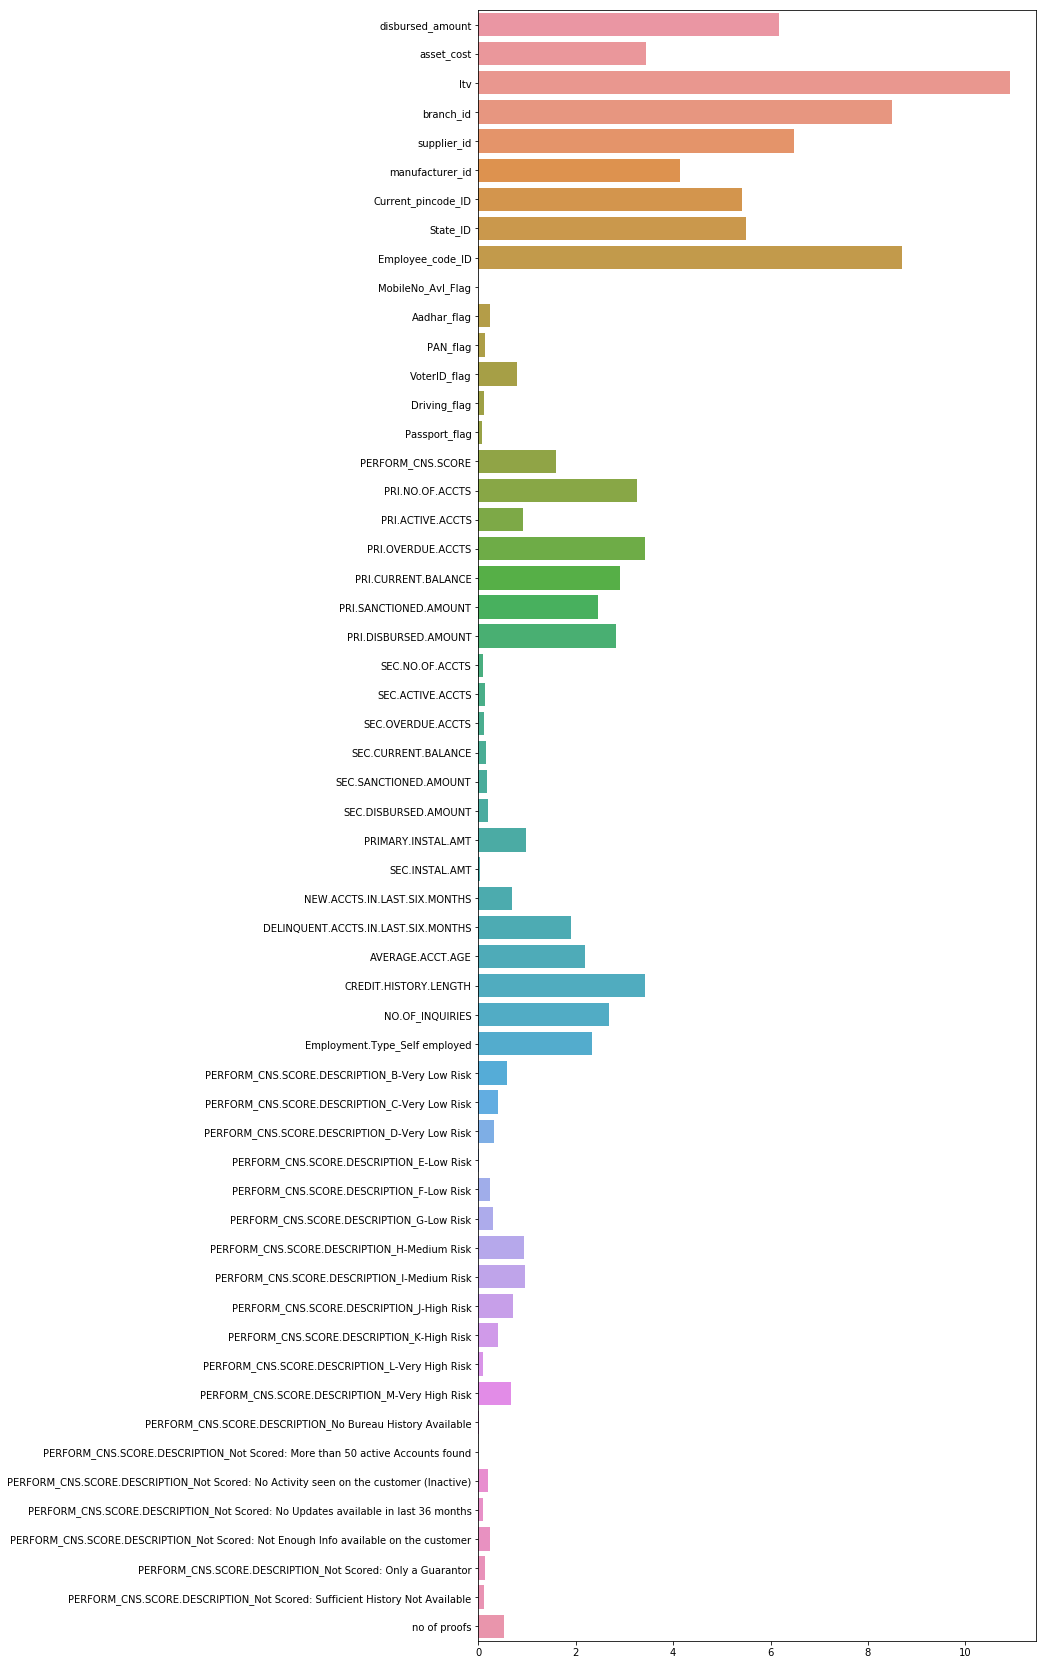

In [30]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(cat_rg1.feature_importances_, trainfeature.drop('loan_default',axis=1).columns, ax=ax)
plt.show()

In [31]:
fea_imp_ = pd.DataFrame({'cols':trainfeature.drop('loan_default',axis=1).columns, 'fea_imp':cat_rg1.feature_importances_})
fea_imp_ =fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False).reset_index(drop=True)

In [32]:
fea_imp_[0:39].cols

0                                                   ltv
1                                      Employee_code_ID
2                                             branch_id
3                                           supplier_id
4                                      disbursed_amount
5                                              State_ID
6                                    Current_pincode_ID
7                                       manufacturer_id
8                                            asset_cost
9                                     PRI.OVERDUE.ACCTS
10                                CREDIT.HISTORY.LENGTH
11                                      PRI.NO.OF.ACCTS
12                                  PRI.CURRENT.BALANCE
13                                 PRI.DISBURSED.AMOUNT
14                                      NO.OF_INQUIRIES
15                                PRI.SANCTIONED.AMOUNT
16                        Employment.Type_Self employed
17                                     AVERAGE.A

In [33]:
X=trainfeature[fea_imp_[0:39].cols]
y=trainfeature['loan_default']

In [34]:
testX=testfeature[fea_imp_[0:39].cols]

In [35]:
X_test =testX
y_test_pred = 0
y_valid_pred = 0*y

In [36]:
X_test =testX
y_test_pred = 0
y_valid_pred = 0*y
# Set up folds
from sklearn.model_selection import KFold
K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
from numba import jit

In [37]:
# Compute gini

# from CPMP's kernel https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
@jit
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [179]:
X.head()

ltv  Employee_code_ID  branch_id  supplier_id  disbursed_amount  \
0  89.55              1998         67        22807         10.831272   
1  73.23              1998         67        22807         10.760983   
2  89.63              1998         67        22807         10.883279   
3  88.48              1998         67        22807         10.959766   
4  88.39              1998         67        22807         10.866242   

   State_ID  Current_pincode_ID  manufacturer_id  asset_cost  \
0         6                1441               45   10.975071   
1         6                1502               45   11.090568   
2         6                1497               45   11.024513   
3         6                1501               45   11.099121   
4         6                1495               45   11.007087   

   PRI.OVERDUE.ACCTS  \
0                  0   
1                  1   
2                  0   
3                  0   
4                  0   

                                           ...                                            \
0                                          ...                                             
1                                          ...                                             
2                                          ...                                             
3                                          ...                                             
4                                          ...                                             

   no of proofs  PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk  \
0             1                                              0   
1             1                                              0   
2             1                                              0   
3             1                                              0   
4             1                                              0   

   PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   PERFORM_CNS.SCORE.DESCRIPTION_G-Low Risk  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer  \
0                                                  0                                     
1                                                  0                                     
2                                                  0                                     
3                                                  0                                     
4                                                  0                                     

   Aadhar_flag  PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk  \
0            1                                         0   
1            1                                         0   
2            1                                         0   
3            1                                         0   
4            1                                         0   

   SEC.DISBURSED.AMOUNT  \
0                     0   
1                     0   
2                     0   
3                     0   
4                     0   

   PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)  
0                                                  

In [38]:
import catboost as cb
from sklearn.metrics import accuracy_score,f1_score
OPTIMIZE_ROUNDS = False
cat_ind1 = [1,2,3,5,6,7]
model=cb.CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',max_depth=8,learning_rate=0.029,od_wait=50
                     ,l2_leaf_reg=5,bagging_temperature=0.85,random_strength=100)

In [39]:

for i, (train_index, test_index) in enumerate(kf.split(trainfeature)):
    
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", i)
    
    # Run model for this fold
    if OPTIMIZE_ROUNDS:
        fit_model = model.fit( X_train, y_train, 
                               eval_set=[X_valid, y_valid],
                               early_stopping_rounds=100,
                               use_best_model=True
                             )
        print( "  N trees = ", model.tree_count_ )
    else:
        fit_model = model.fit( X_train, y_train )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  Gini = ", eval_gini(y_valid, pred) )
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += fit_model.predict_proba(X_test)[:,1]
    
y_test_pred /= K  # Average test set predictions

print( "\nGini for full training set:" )
accuracy_score(y, y_valid_pred, normalize=False)


Fold  0
0:	total: 145ms	remaining: 7m 15s
1:	total: 268ms	remaining: 6m 42s
2:	total: 416ms	remaining: 6m 55s
3:	total: 530ms	remaining: 6m 36s
4:	total: 672ms	remaining: 6m 42s
5:	total: 821ms	remaining: 6m 49s
6:	total: 982ms	remaining: 7m
7:	total: 1.11s	remaining: 6m 57s
8:	total: 1.26s	remaining: 7m
9:	total: 1.39s	remaining: 6m 55s
10:	total: 1.53s	remaining: 6m 56s
11:	total: 1.67s	remaining: 6m 55s
12:	total: 1.81s	remaining: 6m 56s
13:	total: 1.94s	remaining: 6m 53s
14:	total: 2.07s	remaining: 6m 52s
15:	total: 2.21s	remaining: 6m 51s
16:	total: 2.34s	remaining: 6m 51s
17:	total: 2.48s	remaining: 6m 50s
18:	total: 2.63s	remaining: 6m 53s
19:	total: 2.75s	remaining: 6m 50s
20:	total: 2.9s	remaining: 6m 51s
21:	total: 3.02s	remaining: 6m 48s
22:	total: 3.15s	remaining: 6m 48s
23:	total: 3.27s	remaining: 6m 45s
24:	total: 3.42s	remaining: 6m 47s
25:	total: 3.52s	remaining: 6m 43s
26:	total: 3.69s	remaining: 6m 46s
27:	total: 3.86s	remaining: 6m 50s
28:	total: 4.05s	remaining: 6m

234:	total: 31.5s	remaining: 6m 10s
235:	total: 31.6s	remaining: 6m 10s
236:	total: 31.8s	remaining: 6m 10s
237:	total: 31.9s	remaining: 6m 9s
238:	total: 32s	remaining: 6m 9s
239:	total: 32.1s	remaining: 6m 9s
240:	total: 32.2s	remaining: 6m 9s
241:	total: 32.4s	remaining: 6m 8s
242:	total: 32.5s	remaining: 6m 8s
243:	total: 32.6s	remaining: 6m 8s
244:	total: 32.7s	remaining: 6m 8s
245:	total: 32.8s	remaining: 6m 7s
246:	total: 33s	remaining: 6m 7s
247:	total: 33.1s	remaining: 6m 7s
248:	total: 33.2s	remaining: 6m 7s
249:	total: 33.4s	remaining: 6m 6s
250:	total: 33.5s	remaining: 6m 6s
251:	total: 33.6s	remaining: 6m 6s
252:	total: 33.7s	remaining: 6m 6s
253:	total: 33.8s	remaining: 6m 5s
254:	total: 34s	remaining: 6m 5s
255:	total: 34.1s	remaining: 6m 5s
256:	total: 34.2s	remaining: 6m 4s
257:	total: 34.3s	remaining: 6m 4s
258:	total: 34.5s	remaining: 6m 4s
259:	total: 34.6s	remaining: 6m 4s
260:	total: 34.7s	remaining: 6m 4s
261:	total: 34.8s	remaining: 6m 3s
262:	total: 35s	remaini

466:	total: 1m	remaining: 5m 29s
467:	total: 1m	remaining: 5m 28s
468:	total: 1m	remaining: 5m 28s
469:	total: 1m 1s	remaining: 5m 28s
470:	total: 1m 1s	remaining: 5m 28s
471:	total: 1m 1s	remaining: 5m 28s
472:	total: 1m 1s	remaining: 5m 27s
473:	total: 1m 1s	remaining: 5m 27s
474:	total: 1m 1s	remaining: 5m 27s
475:	total: 1m 1s	remaining: 5m 27s
476:	total: 1m 1s	remaining: 5m 27s
477:	total: 1m 1s	remaining: 5m 27s
478:	total: 1m 2s	remaining: 5m 26s
479:	total: 1m 2s	remaining: 5m 26s
480:	total: 1m 2s	remaining: 5m 26s
481:	total: 1m 2s	remaining: 5m 26s
482:	total: 1m 2s	remaining: 5m 26s
483:	total: 1m 2s	remaining: 5m 25s
484:	total: 1m 2s	remaining: 5m 25s
485:	total: 1m 2s	remaining: 5m 25s
486:	total: 1m 3s	remaining: 5m 25s
487:	total: 1m 3s	remaining: 5m 25s
488:	total: 1m 3s	remaining: 5m 25s
489:	total: 1m 3s	remaining: 5m 24s
490:	total: 1m 3s	remaining: 5m 24s
491:	total: 1m 3s	remaining: 5m 24s
492:	total: 1m 3s	remaining: 5m 24s
493:	total: 1m 3s	remaining: 5m 24s
4

694:	total: 1m 32s	remaining: 5m 5s
695:	total: 1m 32s	remaining: 5m 5s
696:	total: 1m 32s	remaining: 5m 5s
697:	total: 1m 32s	remaining: 5m 5s
698:	total: 1m 32s	remaining: 5m 5s
699:	total: 1m 32s	remaining: 5m 5s
700:	total: 1m 33s	remaining: 5m 5s
701:	total: 1m 33s	remaining: 5m 5s
702:	total: 1m 33s	remaining: 5m 5s
703:	total: 1m 33s	remaining: 5m 4s
704:	total: 1m 33s	remaining: 5m 4s
705:	total: 1m 33s	remaining: 5m 4s
706:	total: 1m 33s	remaining: 5m 4s
707:	total: 1m 34s	remaining: 5m 4s
708:	total: 1m 34s	remaining: 5m 4s
709:	total: 1m 34s	remaining: 5m 4s
710:	total: 1m 34s	remaining: 5m 4s
711:	total: 1m 34s	remaining: 5m 4s
712:	total: 1m 34s	remaining: 5m 4s
713:	total: 1m 35s	remaining: 5m 4s
714:	total: 1m 35s	remaining: 5m 4s
715:	total: 1m 35s	remaining: 5m 4s
716:	total: 1m 35s	remaining: 5m 4s
717:	total: 1m 35s	remaining: 5m 3s
718:	total: 1m 35s	remaining: 5m 3s
719:	total: 1m 35s	remaining: 5m 3s
720:	total: 1m 36s	remaining: 5m 3s
721:	total: 1m 36s	remaining

920:	total: 2m 1s	remaining: 4m 35s
921:	total: 2m 2s	remaining: 4m 34s
922:	total: 2m 2s	remaining: 4m 34s
923:	total: 2m 2s	remaining: 4m 34s
924:	total: 2m 2s	remaining: 4m 34s
925:	total: 2m 2s	remaining: 4m 34s
926:	total: 2m 2s	remaining: 4m 34s
927:	total: 2m 2s	remaining: 4m 34s
928:	total: 2m 2s	remaining: 4m 34s
929:	total: 2m 3s	remaining: 4m 33s
930:	total: 2m 3s	remaining: 4m 33s
931:	total: 2m 3s	remaining: 4m 33s
932:	total: 2m 3s	remaining: 4m 33s
933:	total: 2m 3s	remaining: 4m 33s
934:	total: 2m 3s	remaining: 4m 33s
935:	total: 2m 4s	remaining: 4m 33s
936:	total: 2m 4s	remaining: 4m 33s
937:	total: 2m 4s	remaining: 4m 33s
938:	total: 2m 4s	remaining: 4m 33s
939:	total: 2m 4s	remaining: 4m 32s
940:	total: 2m 4s	remaining: 4m 32s
941:	total: 2m 4s	remaining: 4m 32s
942:	total: 2m 4s	remaining: 4m 32s
943:	total: 2m 5s	remaining: 4m 32s
944:	total: 2m 5s	remaining: 4m 32s
945:	total: 2m 5s	remaining: 4m 32s
946:	total: 2m 5s	remaining: 4m 31s
947:	total: 2m 5s	remaining:

1142:	total: 2m 30s	remaining: 4m 4s
1143:	total: 2m 30s	remaining: 4m 4s
1144:	total: 2m 30s	remaining: 4m 4s
1145:	total: 2m 30s	remaining: 4m 4s
1146:	total: 2m 31s	remaining: 4m 4s
1147:	total: 2m 31s	remaining: 4m 3s
1148:	total: 2m 31s	remaining: 4m 3s
1149:	total: 2m 31s	remaining: 4m 3s
1150:	total: 2m 31s	remaining: 4m 3s
1151:	total: 2m 31s	remaining: 4m 3s
1152:	total: 2m 31s	remaining: 4m 3s
1153:	total: 2m 31s	remaining: 4m 3s
1154:	total: 2m 32s	remaining: 4m 3s
1155:	total: 2m 32s	remaining: 4m 2s
1156:	total: 2m 32s	remaining: 4m 2s
1157:	total: 2m 32s	remaining: 4m 2s
1158:	total: 2m 32s	remaining: 4m 2s
1159:	total: 2m 32s	remaining: 4m 2s
1160:	total: 2m 32s	remaining: 4m 2s
1161:	total: 2m 32s	remaining: 4m 1s
1162:	total: 2m 33s	remaining: 4m 1s
1163:	total: 2m 33s	remaining: 4m 1s
1164:	total: 2m 33s	remaining: 4m 1s
1165:	total: 2m 33s	remaining: 4m 1s
1166:	total: 2m 33s	remaining: 4m 1s
1167:	total: 2m 33s	remaining: 4m 1s
1168:	total: 2m 33s	remaining: 4m
1169

1361:	total: 2m 58s	remaining: 3m 35s
1362:	total: 2m 59s	remaining: 3m 34s
1363:	total: 2m 59s	remaining: 3m 34s
1364:	total: 2m 59s	remaining: 3m 34s
1365:	total: 2m 59s	remaining: 3m 34s
1366:	total: 2m 59s	remaining: 3m 34s
1367:	total: 2m 59s	remaining: 3m 34s
1368:	total: 2m 59s	remaining: 3m 34s
1369:	total: 2m 59s	remaining: 3m 34s
1370:	total: 3m	remaining: 3m 33s
1371:	total: 3m	remaining: 3m 33s
1372:	total: 3m	remaining: 3m 33s
1373:	total: 3m	remaining: 3m 33s
1374:	total: 3m	remaining: 3m 33s
1375:	total: 3m	remaining: 3m 33s
1376:	total: 3m	remaining: 3m 33s
1377:	total: 3m 1s	remaining: 3m 33s
1378:	total: 3m 1s	remaining: 3m 32s
1379:	total: 3m 1s	remaining: 3m 32s
1380:	total: 3m 1s	remaining: 3m 32s
1381:	total: 3m 1s	remaining: 3m 32s
1382:	total: 3m 1s	remaining: 3m 32s
1383:	total: 3m 1s	remaining: 3m 32s
1384:	total: 3m 1s	remaining: 3m 32s
1385:	total: 3m 2s	remaining: 3m 31s
1386:	total: 3m 2s	remaining: 3m 31s
1387:	total: 3m 2s	remaining: 3m 31s
1388:	total: 

1581:	total: 3m 26s	remaining: 3m 5s
1582:	total: 3m 26s	remaining: 3m 5s
1583:	total: 3m 27s	remaining: 3m 5s
1584:	total: 3m 27s	remaining: 3m 5s
1585:	total: 3m 27s	remaining: 3m 4s
1586:	total: 3m 27s	remaining: 3m 4s
1587:	total: 3m 27s	remaining: 3m 4s
1588:	total: 3m 27s	remaining: 3m 4s
1589:	total: 3m 27s	remaining: 3m 4s
1590:	total: 3m 28s	remaining: 3m 4s
1591:	total: 3m 28s	remaining: 3m 4s
1592:	total: 3m 28s	remaining: 3m 3s
1593:	total: 3m 28s	remaining: 3m 3s
1594:	total: 3m 28s	remaining: 3m 3s
1595:	total: 3m 28s	remaining: 3m 3s
1596:	total: 3m 28s	remaining: 3m 3s
1597:	total: 3m 28s	remaining: 3m 3s
1598:	total: 3m 29s	remaining: 3m 3s
1599:	total: 3m 29s	remaining: 3m 3s
1600:	total: 3m 29s	remaining: 3m 2s
1601:	total: 3m 29s	remaining: 3m 2s
1602:	total: 3m 29s	remaining: 3m 2s
1603:	total: 3m 29s	remaining: 3m 2s
1604:	total: 3m 29s	remaining: 3m 2s
1605:	total: 3m 29s	remaining: 3m 2s
1606:	total: 3m 29s	remaining: 3m 2s
1607:	total: 3m 30s	remaining: 3m 1s
1

1799:	total: 3m 58s	remaining: 2m 39s
1800:	total: 3m 58s	remaining: 2m 38s
1801:	total: 3m 58s	remaining: 2m 38s
1802:	total: 3m 58s	remaining: 2m 38s
1803:	total: 3m 59s	remaining: 2m 38s
1804:	total: 3m 59s	remaining: 2m 38s
1805:	total: 3m 59s	remaining: 2m 38s
1806:	total: 3m 59s	remaining: 2m 38s
1807:	total: 3m 59s	remaining: 2m 38s
1808:	total: 3m 59s	remaining: 2m 37s
1809:	total: 4m	remaining: 2m 37s
1810:	total: 4m	remaining: 2m 37s
1811:	total: 4m	remaining: 2m 37s
1812:	total: 4m	remaining: 2m 37s
1813:	total: 4m	remaining: 2m 37s
1814:	total: 4m	remaining: 2m 37s
1815:	total: 4m	remaining: 2m 36s
1816:	total: 4m	remaining: 2m 36s
1817:	total: 4m 1s	remaining: 2m 36s
1818:	total: 4m 1s	remaining: 2m 36s
1819:	total: 4m 1s	remaining: 2m 36s
1820:	total: 4m 1s	remaining: 2m 36s
1821:	total: 4m 1s	remaining: 2m 36s
1822:	total: 4m 1s	remaining: 2m 36s
1823:	total: 4m 1s	remaining: 2m 35s
1824:	total: 4m 2s	remaining: 2m 35s
1825:	total: 4m 2s	remaining: 2m 35s
1826:	total: 4m

2019:	total: 4m 30s	remaining: 2m 11s
2020:	total: 4m 31s	remaining: 2m 11s
2021:	total: 4m 31s	remaining: 2m 11s
2022:	total: 4m 31s	remaining: 2m 11s
2023:	total: 4m 31s	remaining: 2m 10s
2024:	total: 4m 31s	remaining: 2m 10s
2025:	total: 4m 31s	remaining: 2m 10s
2026:	total: 4m 32s	remaining: 2m 10s
2027:	total: 4m 32s	remaining: 2m 10s
2028:	total: 4m 32s	remaining: 2m 10s
2029:	total: 4m 32s	remaining: 2m 10s
2030:	total: 4m 32s	remaining: 2m 10s
2031:	total: 4m 32s	remaining: 2m 9s
2032:	total: 4m 32s	remaining: 2m 9s
2033:	total: 4m 33s	remaining: 2m 9s
2034:	total: 4m 33s	remaining: 2m 9s
2035:	total: 4m 33s	remaining: 2m 9s
2036:	total: 4m 33s	remaining: 2m 9s
2037:	total: 4m 33s	remaining: 2m 9s
2038:	total: 4m 33s	remaining: 2m 9s
2039:	total: 4m 34s	remaining: 2m 8s
2040:	total: 4m 34s	remaining: 2m 8s
2041:	total: 4m 34s	remaining: 2m 8s
2042:	total: 4m 34s	remaining: 2m 8s
2043:	total: 4m 34s	remaining: 2m 8s
2044:	total: 4m 34s	remaining: 2m 8s
2045:	total: 4m 34s	remain

2239:	total: 5m 1s	remaining: 1m 42s
2240:	total: 5m 2s	remaining: 1m 42s
2241:	total: 5m 2s	remaining: 1m 42s
2242:	total: 5m 2s	remaining: 1m 42s
2243:	total: 5m 2s	remaining: 1m 41s
2244:	total: 5m 2s	remaining: 1m 41s
2245:	total: 5m 2s	remaining: 1m 41s
2246:	total: 5m 2s	remaining: 1m 41s
2247:	total: 5m 2s	remaining: 1m 41s
2248:	total: 5m 3s	remaining: 1m 41s
2249:	total: 5m 3s	remaining: 1m 41s
2250:	total: 5m 3s	remaining: 1m 40s
2251:	total: 5m 3s	remaining: 1m 40s
2252:	total: 5m 3s	remaining: 1m 40s
2253:	total: 5m 3s	remaining: 1m 40s
2254:	total: 5m 3s	remaining: 1m 40s
2255:	total: 5m 3s	remaining: 1m 40s
2256:	total: 5m 4s	remaining: 1m 40s
2257:	total: 5m 4s	remaining: 1m 39s
2258:	total: 5m 4s	remaining: 1m 39s
2259:	total: 5m 4s	remaining: 1m 39s
2260:	total: 5m 4s	remaining: 1m 39s
2261:	total: 5m 4s	remaining: 1m 39s
2262:	total: 5m 5s	remaining: 1m 39s
2263:	total: 5m 5s	remaining: 1m 39s
2264:	total: 5m 5s	remaining: 1m 39s
2265:	total: 5m 5s	remaining: 1m 38s
2

2458:	total: 5m 31s	remaining: 1m 12s
2459:	total: 5m 31s	remaining: 1m 12s
2460:	total: 5m 32s	remaining: 1m 12s
2461:	total: 5m 32s	remaining: 1m 12s
2462:	total: 5m 32s	remaining: 1m 12s
2463:	total: 5m 32s	remaining: 1m 12s
2464:	total: 5m 32s	remaining: 1m 12s
2465:	total: 5m 32s	remaining: 1m 12s
2466:	total: 5m 32s	remaining: 1m 11s
2467:	total: 5m 32s	remaining: 1m 11s
2468:	total: 5m 33s	remaining: 1m 11s
2469:	total: 5m 33s	remaining: 1m 11s
2470:	total: 5m 33s	remaining: 1m 11s
2471:	total: 5m 33s	remaining: 1m 11s
2472:	total: 5m 33s	remaining: 1m 11s
2473:	total: 5m 33s	remaining: 1m 10s
2474:	total: 5m 33s	remaining: 1m 10s
2475:	total: 5m 33s	remaining: 1m 10s
2476:	total: 5m 34s	remaining: 1m 10s
2477:	total: 5m 34s	remaining: 1m 10s
2478:	total: 5m 34s	remaining: 1m 10s
2479:	total: 5m 34s	remaining: 1m 10s
2480:	total: 5m 34s	remaining: 1m 9s
2481:	total: 5m 34s	remaining: 1m 9s
2482:	total: 5m 34s	remaining: 1m 9s
2483:	total: 5m 35s	remaining: 1m 9s
2484:	total: 5m 

2681:	total: 5m 59s	remaining: 42.7s
2682:	total: 6m	remaining: 42.5s
2683:	total: 6m	remaining: 42.4s
2684:	total: 6m	remaining: 42.3s
2685:	total: 6m	remaining: 42.1s
2686:	total: 6m	remaining: 42s
2687:	total: 6m	remaining: 41.9s
2688:	total: 6m	remaining: 41.7s
2689:	total: 6m 1s	remaining: 41.6s
2690:	total: 6m 1s	remaining: 41.5s
2691:	total: 6m 1s	remaining: 41.3s
2692:	total: 6m 1s	remaining: 41.2s
2693:	total: 6m 1s	remaining: 41.1s
2694:	total: 6m 1s	remaining: 41s
2695:	total: 6m 1s	remaining: 40.8s
2696:	total: 6m 2s	remaining: 40.7s
2697:	total: 6m 2s	remaining: 40.6s
2698:	total: 6m 2s	remaining: 40.4s
2699:	total: 6m 2s	remaining: 40.3s
2700:	total: 6m 2s	remaining: 40.2s
2701:	total: 6m 2s	remaining: 40s
2702:	total: 6m 3s	remaining: 39.9s
2703:	total: 6m 3s	remaining: 39.8s
2704:	total: 6m 3s	remaining: 39.6s
2705:	total: 6m 3s	remaining: 39.5s
2706:	total: 6m 3s	remaining: 39.4s
2707:	total: 6m 3s	remaining: 39.2s
2708:	total: 6m 3s	remaining: 39.1s
2709:	total: 6m 4s

2908:	total: 6m 32s	remaining: 12.3s
2909:	total: 6m 32s	remaining: 12.1s
2910:	total: 6m 32s	remaining: 12s
2911:	total: 6m 32s	remaining: 11.9s
2912:	total: 6m 33s	remaining: 11.7s
2913:	total: 6m 33s	remaining: 11.6s
2914:	total: 6m 33s	remaining: 11.5s
2915:	total: 6m 33s	remaining: 11.3s
2916:	total: 6m 33s	remaining: 11.2s
2917:	total: 6m 33s	remaining: 11.1s
2918:	total: 6m 33s	remaining: 10.9s
2919:	total: 6m 33s	remaining: 10.8s
2920:	total: 6m 34s	remaining: 10.7s
2921:	total: 6m 34s	remaining: 10.5s
2922:	total: 6m 34s	remaining: 10.4s
2923:	total: 6m 34s	remaining: 10.3s
2924:	total: 6m 34s	remaining: 10.1s
2925:	total: 6m 34s	remaining: 9.98s
2926:	total: 6m 34s	remaining: 9.85s
2927:	total: 6m 35s	remaining: 9.72s
2928:	total: 6m 35s	remaining: 9.58s
2929:	total: 6m 35s	remaining: 9.45s
2930:	total: 6m 35s	remaining: 9.31s
2931:	total: 6m 35s	remaining: 9.18s
2932:	total: 6m 35s	remaining: 9.04s
2933:	total: 6m 35s	remaining: 8.91s
2934:	total: 6m 36s	remaining: 8.77s
293

138:	total: 19s	remaining: 6m 31s
139:	total: 19.2s	remaining: 6m 31s
140:	total: 19.3s	remaining: 6m 31s
141:	total: 19.5s	remaining: 6m 31s
142:	total: 19.6s	remaining: 6m 32s
143:	total: 19.7s	remaining: 6m 31s
144:	total: 19.9s	remaining: 6m 31s
145:	total: 20s	remaining: 6m 30s
146:	total: 20.1s	remaining: 6m 30s
147:	total: 20.2s	remaining: 6m 30s
148:	total: 20.4s	remaining: 6m 29s
149:	total: 20.5s	remaining: 6m 29s
150:	total: 20.6s	remaining: 6m 29s
151:	total: 20.7s	remaining: 6m 28s
152:	total: 20.9s	remaining: 6m 28s
153:	total: 21s	remaining: 6m 27s
154:	total: 21.1s	remaining: 6m 27s
155:	total: 21.2s	remaining: 6m 27s
156:	total: 21.4s	remaining: 6m 27s
157:	total: 21.5s	remaining: 6m 26s
158:	total: 21.6s	remaining: 6m 26s
159:	total: 21.7s	remaining: 6m 25s
160:	total: 21.9s	remaining: 6m 25s
161:	total: 22s	remaining: 6m 25s
162:	total: 22.1s	remaining: 6m 25s
163:	total: 22.3s	remaining: 6m 25s
164:	total: 22.4s	remaining: 6m 24s
165:	total: 22.5s	remaining: 6m 24s


370:	total: 48.2s	remaining: 5m 41s
371:	total: 48.3s	remaining: 5m 41s
372:	total: 48.4s	remaining: 5m 41s
373:	total: 48.5s	remaining: 5m 40s
374:	total: 48.7s	remaining: 5m 40s
375:	total: 48.8s	remaining: 5m 40s
376:	total: 48.9s	remaining: 5m 40s
377:	total: 49s	remaining: 5m 40s
378:	total: 49.2s	remaining: 5m 39s
379:	total: 49.3s	remaining: 5m 39s
380:	total: 49.4s	remaining: 5m 39s
381:	total: 49.5s	remaining: 5m 39s
382:	total: 49.7s	remaining: 5m 39s
383:	total: 49.8s	remaining: 5m 39s
384:	total: 49.9s	remaining: 5m 38s
385:	total: 50s	remaining: 5m 38s
386:	total: 50.2s	remaining: 5m 38s
387:	total: 50.3s	remaining: 5m 38s
388:	total: 50.4s	remaining: 5m 38s
389:	total: 50.5s	remaining: 5m 37s
390:	total: 50.6s	remaining: 5m 37s
391:	total: 50.8s	remaining: 5m 37s
392:	total: 50.9s	remaining: 5m 37s
393:	total: 51s	remaining: 5m 37s
394:	total: 51.1s	remaining: 5m 37s
395:	total: 51.2s	remaining: 5m 36s
396:	total: 51.4s	remaining: 5m 36s
397:	total: 51.5s	remaining: 5m 36

598:	total: 1m 20s	remaining: 5m 22s
599:	total: 1m 20s	remaining: 5m 22s
600:	total: 1m 20s	remaining: 5m 22s
601:	total: 1m 20s	remaining: 5m 22s
602:	total: 1m 21s	remaining: 5m 22s
603:	total: 1m 21s	remaining: 5m 22s
604:	total: 1m 21s	remaining: 5m 22s
605:	total: 1m 21s	remaining: 5m 21s
606:	total: 1m 21s	remaining: 5m 21s
607:	total: 1m 21s	remaining: 5m 21s
608:	total: 1m 21s	remaining: 5m 21s
609:	total: 1m 22s	remaining: 5m 21s
610:	total: 1m 22s	remaining: 5m 21s
611:	total: 1m 22s	remaining: 5m 20s
612:	total: 1m 22s	remaining: 5m 20s
613:	total: 1m 22s	remaining: 5m 20s
614:	total: 1m 22s	remaining: 5m 20s
615:	total: 1m 22s	remaining: 5m 20s
616:	total: 1m 22s	remaining: 5m 20s
617:	total: 1m 23s	remaining: 5m 20s
618:	total: 1m 23s	remaining: 5m 19s
619:	total: 1m 23s	remaining: 5m 19s
620:	total: 1m 23s	remaining: 5m 19s
621:	total: 1m 23s	remaining: 5m 19s
622:	total: 1m 23s	remaining: 5m 19s
623:	total: 1m 23s	remaining: 5m 19s
624:	total: 1m 23s	remaining: 5m 19s
6

822:	total: 1m 50s	remaining: 4m 53s
823:	total: 1m 50s	remaining: 4m 52s
824:	total: 1m 51s	remaining: 4m 52s
825:	total: 1m 51s	remaining: 4m 52s
826:	total: 1m 51s	remaining: 4m 52s
827:	total: 1m 51s	remaining: 4m 52s
828:	total: 1m 51s	remaining: 4m 52s
829:	total: 1m 51s	remaining: 4m 51s
830:	total: 1m 51s	remaining: 4m 51s
831:	total: 1m 51s	remaining: 4m 51s
832:	total: 1m 51s	remaining: 4m 51s
833:	total: 1m 52s	remaining: 4m 51s
834:	total: 1m 52s	remaining: 4m 51s
835:	total: 1m 52s	remaining: 4m 50s
836:	total: 1m 52s	remaining: 4m 50s
837:	total: 1m 52s	remaining: 4m 50s
838:	total: 1m 52s	remaining: 4m 50s
839:	total: 1m 52s	remaining: 4m 50s
840:	total: 1m 52s	remaining: 4m 50s
841:	total: 1m 53s	remaining: 4m 49s
842:	total: 1m 53s	remaining: 4m 49s
843:	total: 1m 53s	remaining: 4m 49s
844:	total: 1m 53s	remaining: 4m 49s
845:	total: 1m 53s	remaining: 4m 49s
846:	total: 1m 53s	remaining: 4m 49s
847:	total: 1m 53s	remaining: 4m 48s
848:	total: 1m 53s	remaining: 4m 48s
8

1046:	total: 2m 19s	remaining: 4m 21s
1047:	total: 2m 20s	remaining: 4m 21s
1048:	total: 2m 20s	remaining: 4m 21s
1049:	total: 2m 20s	remaining: 4m 20s
1050:	total: 2m 20s	remaining: 4m 20s
1051:	total: 2m 20s	remaining: 4m 20s
1052:	total: 2m 20s	remaining: 4m 20s
1053:	total: 2m 21s	remaining: 4m 20s
1054:	total: 2m 21s	remaining: 4m 20s
1055:	total: 2m 21s	remaining: 4m 20s
1056:	total: 2m 21s	remaining: 4m 20s
1057:	total: 2m 21s	remaining: 4m 19s
1058:	total: 2m 21s	remaining: 4m 19s
1059:	total: 2m 21s	remaining: 4m 19s
1060:	total: 2m 22s	remaining: 4m 19s
1061:	total: 2m 22s	remaining: 4m 19s
1062:	total: 2m 22s	remaining: 4m 19s
1063:	total: 2m 22s	remaining: 4m 19s
1064:	total: 2m 22s	remaining: 4m 19s
1065:	total: 2m 22s	remaining: 4m 18s
1066:	total: 2m 22s	remaining: 4m 18s
1067:	total: 2m 22s	remaining: 4m 18s
1068:	total: 2m 23s	remaining: 4m 18s
1069:	total: 2m 23s	remaining: 4m 18s
1070:	total: 2m 23s	remaining: 4m 18s
1071:	total: 2m 23s	remaining: 4m 18s
1072:	total:

1265:	total: 2m 47s	remaining: 3m 49s
1266:	total: 2m 47s	remaining: 3m 49s
1267:	total: 2m 47s	remaining: 3m 49s
1268:	total: 2m 47s	remaining: 3m 48s
1269:	total: 2m 47s	remaining: 3m 48s
1270:	total: 2m 48s	remaining: 3m 48s
1271:	total: 2m 48s	remaining: 3m 48s
1272:	total: 2m 48s	remaining: 3m 48s
1273:	total: 2m 48s	remaining: 3m 48s
1274:	total: 2m 48s	remaining: 3m 47s
1275:	total: 2m 48s	remaining: 3m 47s
1276:	total: 2m 48s	remaining: 3m 47s
1277:	total: 2m 48s	remaining: 3m 47s
1278:	total: 2m 48s	remaining: 3m 47s
1279:	total: 2m 49s	remaining: 3m 47s
1280:	total: 2m 49s	remaining: 3m 47s
1281:	total: 2m 49s	remaining: 3m 46s
1282:	total: 2m 49s	remaining: 3m 46s
1283:	total: 2m 49s	remaining: 3m 46s
1284:	total: 2m 49s	remaining: 3m 46s
1285:	total: 2m 49s	remaining: 3m 46s
1286:	total: 2m 49s	remaining: 3m 46s
1287:	total: 2m 50s	remaining: 3m 46s
1288:	total: 2m 50s	remaining: 3m 45s
1289:	total: 2m 50s	remaining: 3m 45s
1290:	total: 2m 50s	remaining: 3m 45s
1291:	total:

1485:	total: 3m 14s	remaining: 3m 17s
1486:	total: 3m 14s	remaining: 3m 17s
1487:	total: 3m 14s	remaining: 3m 17s
1488:	total: 3m 14s	remaining: 3m 17s
1489:	total: 3m 14s	remaining: 3m 17s
1490:	total: 3m 14s	remaining: 3m 17s
1491:	total: 3m 15s	remaining: 3m 17s
1492:	total: 3m 15s	remaining: 3m 17s
1493:	total: 3m 15s	remaining: 3m 16s
1494:	total: 3m 15s	remaining: 3m 16s
1495:	total: 3m 15s	remaining: 3m 16s
1496:	total: 3m 15s	remaining: 3m 16s
1497:	total: 3m 15s	remaining: 3m 16s
1498:	total: 3m 16s	remaining: 3m 16s
1499:	total: 3m 16s	remaining: 3m 16s
1500:	total: 3m 16s	remaining: 3m 16s
1501:	total: 3m 16s	remaining: 3m 16s
1502:	total: 3m 16s	remaining: 3m 15s
1503:	total: 3m 16s	remaining: 3m 15s
1504:	total: 3m 16s	remaining: 3m 15s
1505:	total: 3m 17s	remaining: 3m 15s
1506:	total: 3m 17s	remaining: 3m 15s
1507:	total: 3m 17s	remaining: 3m 15s
1508:	total: 3m 17s	remaining: 3m 15s
1509:	total: 3m 17s	remaining: 3m 15s
1510:	total: 3m 17s	remaining: 3m 14s
1511:	total:

1705:	total: 3m 42s	remaining: 2m 49s
1706:	total: 3m 43s	remaining: 2m 49s
1707:	total: 3m 43s	remaining: 2m 48s
1708:	total: 3m 43s	remaining: 2m 48s
1709:	total: 3m 43s	remaining: 2m 48s
1710:	total: 3m 43s	remaining: 2m 48s
1711:	total: 3m 43s	remaining: 2m 48s
1712:	total: 3m 43s	remaining: 2m 48s
1713:	total: 3m 43s	remaining: 2m 48s
1714:	total: 3m 44s	remaining: 2m 47s
1715:	total: 3m 44s	remaining: 2m 47s
1716:	total: 3m 44s	remaining: 2m 47s
1717:	total: 3m 44s	remaining: 2m 47s
1718:	total: 3m 44s	remaining: 2m 47s
1719:	total: 3m 44s	remaining: 2m 47s
1720:	total: 3m 44s	remaining: 2m 47s
1721:	total: 3m 44s	remaining: 2m 46s
1722:	total: 3m 45s	remaining: 2m 46s
1723:	total: 3m 45s	remaining: 2m 46s
1724:	total: 3m 45s	remaining: 2m 46s
1725:	total: 3m 45s	remaining: 2m 46s
1726:	total: 3m 45s	remaining: 2m 46s
1727:	total: 3m 45s	remaining: 2m 46s
1728:	total: 3m 45s	remaining: 2m 46s
1729:	total: 3m 45s	remaining: 2m 45s
1730:	total: 3m 46s	remaining: 2m 45s
1731:	total:

1925:	total: 4m 10s	remaining: 2m 19s
1926:	total: 4m 10s	remaining: 2m 19s
1927:	total: 4m 10s	remaining: 2m 19s
1928:	total: 4m 11s	remaining: 2m 19s
1929:	total: 4m 11s	remaining: 2m 19s
1930:	total: 4m 11s	remaining: 2m 19s
1931:	total: 4m 11s	remaining: 2m 18s
1932:	total: 4m 11s	remaining: 2m 18s
1933:	total: 4m 11s	remaining: 2m 18s
1934:	total: 4m 11s	remaining: 2m 18s
1935:	total: 4m 11s	remaining: 2m 18s
1936:	total: 4m 12s	remaining: 2m 18s
1937:	total: 4m 12s	remaining: 2m 18s
1938:	total: 4m 12s	remaining: 2m 18s
1939:	total: 4m 12s	remaining: 2m 17s
1940:	total: 4m 12s	remaining: 2m 17s
1941:	total: 4m 12s	remaining: 2m 17s
1942:	total: 4m 12s	remaining: 2m 17s
1943:	total: 4m 13s	remaining: 2m 17s
1944:	total: 4m 13s	remaining: 2m 17s
1945:	total: 4m 13s	remaining: 2m 17s
1946:	total: 4m 13s	remaining: 2m 17s
1947:	total: 4m 13s	remaining: 2m 16s
1948:	total: 4m 13s	remaining: 2m 16s
1949:	total: 4m 13s	remaining: 2m 16s
1950:	total: 4m 13s	remaining: 2m 16s
1951:	total:

2145:	total: 4m 40s	remaining: 1m 51s
2146:	total: 4m 40s	remaining: 1m 51s
2147:	total: 4m 40s	remaining: 1m 51s
2148:	total: 4m 40s	remaining: 1m 51s
2149:	total: 4m 40s	remaining: 1m 50s
2150:	total: 4m 40s	remaining: 1m 50s
2151:	total: 4m 40s	remaining: 1m 50s
2152:	total: 4m 41s	remaining: 1m 50s
2153:	total: 4m 41s	remaining: 1m 50s
2154:	total: 4m 41s	remaining: 1m 50s
2155:	total: 4m 41s	remaining: 1m 50s
2156:	total: 4m 41s	remaining: 1m 50s
2157:	total: 4m 41s	remaining: 1m 49s
2158:	total: 4m 41s	remaining: 1m 49s
2159:	total: 4m 41s	remaining: 1m 49s
2160:	total: 4m 42s	remaining: 1m 49s
2161:	total: 4m 42s	remaining: 1m 49s
2162:	total: 4m 42s	remaining: 1m 49s
2163:	total: 4m 42s	remaining: 1m 49s
2164:	total: 4m 42s	remaining: 1m 48s
2165:	total: 4m 42s	remaining: 1m 48s
2166:	total: 4m 42s	remaining: 1m 48s
2167:	total: 4m 42s	remaining: 1m 48s
2168:	total: 4m 43s	remaining: 1m 48s
2169:	total: 4m 43s	remaining: 1m 48s
2170:	total: 4m 43s	remaining: 1m 48s
2171:	total:

2364:	total: 5m 7s	remaining: 1m 22s
2365:	total: 5m 7s	remaining: 1m 22s
2366:	total: 5m 7s	remaining: 1m 22s
2367:	total: 5m 7s	remaining: 1m 22s
2368:	total: 5m 8s	remaining: 1m 22s
2369:	total: 5m 8s	remaining: 1m 21s
2370:	total: 5m 8s	remaining: 1m 21s
2371:	total: 5m 8s	remaining: 1m 21s
2372:	total: 5m 8s	remaining: 1m 21s
2373:	total: 5m 8s	remaining: 1m 21s
2374:	total: 5m 8s	remaining: 1m 21s
2375:	total: 5m 8s	remaining: 1m 21s
2376:	total: 5m 8s	remaining: 1m 20s
2377:	total: 5m 9s	remaining: 1m 20s
2378:	total: 5m 9s	remaining: 1m 20s
2379:	total: 5m 9s	remaining: 1m 20s
2380:	total: 5m 9s	remaining: 1m 20s
2381:	total: 5m 9s	remaining: 1m 20s
2382:	total: 5m 9s	remaining: 1m 20s
2383:	total: 5m 9s	remaining: 1m 20s
2384:	total: 5m 9s	remaining: 1m 19s
2385:	total: 5m 10s	remaining: 1m 19s
2386:	total: 5m 10s	remaining: 1m 19s
2387:	total: 5m 10s	remaining: 1m 19s
2388:	total: 5m 10s	remaining: 1m 19s
2389:	total: 5m 10s	remaining: 1m 19s
2390:	total: 5m 10s	remaining: 1m

2586:	total: 5m 36s	remaining: 53.7s
2587:	total: 5m 36s	remaining: 53.6s
2588:	total: 5m 36s	remaining: 53.5s
2589:	total: 5m 36s	remaining: 53.3s
2590:	total: 5m 37s	remaining: 53.2s
2591:	total: 5m 37s	remaining: 53.1s
2592:	total: 5m 37s	remaining: 52.9s
2593:	total: 5m 37s	remaining: 52.8s
2594:	total: 5m 37s	remaining: 52.7s
2595:	total: 5m 37s	remaining: 52.5s
2596:	total: 5m 37s	remaining: 52.4s
2597:	total: 5m 37s	remaining: 52.3s
2598:	total: 5m 38s	remaining: 52.2s
2599:	total: 5m 38s	remaining: 52s
2600:	total: 5m 38s	remaining: 51.9s
2601:	total: 5m 38s	remaining: 51.8s
2602:	total: 5m 38s	remaining: 51.6s
2603:	total: 5m 38s	remaining: 51.5s
2604:	total: 5m 38s	remaining: 51.4s
2605:	total: 5m 38s	remaining: 51.2s
2606:	total: 5m 39s	remaining: 51.1s
2607:	total: 5m 39s	remaining: 51s
2608:	total: 5m 39s	remaining: 50.9s
2609:	total: 5m 39s	remaining: 50.7s
2610:	total: 5m 39s	remaining: 50.6s
2611:	total: 5m 39s	remaining: 50.5s
2612:	total: 5m 39s	remaining: 50.3s
2613:

2812:	total: 6m 8s	remaining: 24.5s
2813:	total: 6m 8s	remaining: 24.3s
2814:	total: 6m 8s	remaining: 24.2s
2815:	total: 6m 8s	remaining: 24.1s
2816:	total: 6m 8s	remaining: 24s
2817:	total: 6m 8s	remaining: 23.8s
2818:	total: 6m 8s	remaining: 23.7s
2819:	total: 6m 9s	remaining: 23.6s
2820:	total: 6m 9s	remaining: 23.4s
2821:	total: 6m 9s	remaining: 23.3s
2822:	total: 6m 9s	remaining: 23.2s
2823:	total: 6m 9s	remaining: 23s
2824:	total: 6m 9s	remaining: 22.9s
2825:	total: 6m 9s	remaining: 22.8s
2826:	total: 6m 9s	remaining: 22.6s
2827:	total: 6m 10s	remaining: 22.5s
2828:	total: 6m 10s	remaining: 22.4s
2829:	total: 6m 10s	remaining: 22.2s
2830:	total: 6m 10s	remaining: 22.1s
2831:	total: 6m 10s	remaining: 22s
2832:	total: 6m 10s	remaining: 21.9s
2833:	total: 6m 10s	remaining: 21.7s
2834:	total: 6m 10s	remaining: 21.6s
2835:	total: 6m 11s	remaining: 21.5s
2836:	total: 6m 11s	remaining: 21.3s
2837:	total: 6m 11s	remaining: 21.2s
2838:	total: 6m 11s	remaining: 21.1s
2839:	total: 6m 11s	re

38:	total: 4.76s	remaining: 6m 1s
39:	total: 4.9s	remaining: 6m 2s
40:	total: 5.04s	remaining: 6m 3s
41:	total: 5.19s	remaining: 6m 5s
42:	total: 5.32s	remaining: 6m 5s
43:	total: 5.45s	remaining: 6m 6s
44:	total: 5.57s	remaining: 6m 5s
45:	total: 5.7s	remaining: 6m 6s
46:	total: 5.84s	remaining: 6m 7s
47:	total: 5.99s	remaining: 6m 8s
48:	total: 6.14s	remaining: 6m 10s
49:	total: 6.3s	remaining: 6m 11s
50:	total: 6.45s	remaining: 6m 12s
51:	total: 6.59s	remaining: 6m 13s
52:	total: 6.76s	remaining: 6m 15s
53:	total: 6.92s	remaining: 6m 17s
54:	total: 7.05s	remaining: 6m 17s
55:	total: 7.17s	remaining: 6m 17s
56:	total: 7.33s	remaining: 6m 18s
57:	total: 7.48s	remaining: 6m 19s
58:	total: 7.65s	remaining: 6m 21s
59:	total: 7.8s	remaining: 6m 22s
60:	total: 7.96s	remaining: 6m 23s
61:	total: 8.11s	remaining: 6m 24s
62:	total: 8.25s	remaining: 6m 24s
63:	total: 8.38s	remaining: 6m 24s
64:	total: 8.53s	remaining: 6m 25s
65:	total: 8.67s	remaining: 6m 25s
66:	total: 8.81s	remaining: 6m 25s

271:	total: 33.5s	remaining: 5m 35s
272:	total: 33.6s	remaining: 5m 35s
273:	total: 33.7s	remaining: 5m 35s
274:	total: 33.8s	remaining: 5m 35s
275:	total: 33.9s	remaining: 5m 35s
276:	total: 34.1s	remaining: 5m 34s
277:	total: 34.2s	remaining: 5m 34s
278:	total: 34.3s	remaining: 5m 34s
279:	total: 34.4s	remaining: 5m 34s
280:	total: 34.5s	remaining: 5m 33s
281:	total: 34.6s	remaining: 5m 33s
282:	total: 34.7s	remaining: 5m 33s
283:	total: 34.9s	remaining: 5m 33s
284:	total: 35s	remaining: 5m 33s
285:	total: 35.1s	remaining: 5m 33s
286:	total: 35.2s	remaining: 5m 32s
287:	total: 35.3s	remaining: 5m 32s
288:	total: 35.5s	remaining: 5m 32s
289:	total: 35.6s	remaining: 5m 32s
290:	total: 35.7s	remaining: 5m 32s
291:	total: 35.8s	remaining: 5m 32s
292:	total: 35.9s	remaining: 5m 32s
293:	total: 36.1s	remaining: 5m 31s
294:	total: 36.2s	remaining: 5m 31s
295:	total: 36.3s	remaining: 5m 31s
296:	total: 36.4s	remaining: 5m 31s
297:	total: 36.5s	remaining: 5m 31s
298:	total: 36.6s	remaining: 5

503:	total: 1m	remaining: 5m 1s
504:	total: 1m	remaining: 5m 1s
505:	total: 1m 1s	remaining: 5m
506:	total: 1m 1s	remaining: 5m
507:	total: 1m 1s	remaining: 5m
508:	total: 1m 1s	remaining: 5m
509:	total: 1m 1s	remaining: 5m
510:	total: 1m 1s	remaining: 5m
511:	total: 1m 1s	remaining: 5m
512:	total: 1m 1s	remaining: 4m 59s
513:	total: 1m 1s	remaining: 4m 59s
514:	total: 1m 2s	remaining: 4m 59s
515:	total: 1m 2s	remaining: 4m 59s
516:	total: 1m 2s	remaining: 4m 59s
517:	total: 1m 2s	remaining: 4m 59s
518:	total: 1m 2s	remaining: 4m 59s
519:	total: 1m 2s	remaining: 4m 59s
520:	total: 1m 2s	remaining: 4m 58s
521:	total: 1m 2s	remaining: 4m 58s
522:	total: 1m 3s	remaining: 4m 58s
523:	total: 1m 3s	remaining: 4m 58s
524:	total: 1m 3s	remaining: 4m 58s
525:	total: 1m 3s	remaining: 4m 58s
526:	total: 1m 3s	remaining: 4m 58s
527:	total: 1m 3s	remaining: 4m 58s
528:	total: 1m 3s	remaining: 4m 57s
529:	total: 1m 3s	remaining: 4m 57s
530:	total: 1m 4s	remaining: 4m 57s
531:	total: 1m 4s	remaining:

729:	total: 1m 27s	remaining: 4m 32s
730:	total: 1m 27s	remaining: 4m 32s
731:	total: 1m 28s	remaining: 4m 32s
732:	total: 1m 28s	remaining: 4m 32s
733:	total: 1m 28s	remaining: 4m 32s
734:	total: 1m 28s	remaining: 4m 32s
735:	total: 1m 28s	remaining: 4m 32s
736:	total: 1m 28s	remaining: 4m 32s
737:	total: 1m 28s	remaining: 4m 31s
738:	total: 1m 28s	remaining: 4m 31s
739:	total: 1m 28s	remaining: 4m 31s
740:	total: 1m 29s	remaining: 4m 31s
741:	total: 1m 29s	remaining: 4m 31s
742:	total: 1m 29s	remaining: 4m 31s
743:	total: 1m 29s	remaining: 4m 31s
744:	total: 1m 29s	remaining: 4m 31s
745:	total: 1m 29s	remaining: 4m 30s
746:	total: 1m 29s	remaining: 4m 30s
747:	total: 1m 29s	remaining: 4m 30s
748:	total: 1m 30s	remaining: 4m 30s
749:	total: 1m 30s	remaining: 4m 30s
750:	total: 1m 30s	remaining: 4m 30s
751:	total: 1m 30s	remaining: 4m 30s
752:	total: 1m 30s	remaining: 4m 30s
753:	total: 1m 30s	remaining: 4m 29s
754:	total: 1m 30s	remaining: 4m 29s
755:	total: 1m 30s	remaining: 4m 29s
7

953:	total: 1m 54s	remaining: 4m 6s
954:	total: 1m 55s	remaining: 4m 6s
955:	total: 1m 55s	remaining: 4m 6s
956:	total: 1m 55s	remaining: 4m 6s
957:	total: 1m 55s	remaining: 4m 5s
958:	total: 1m 55s	remaining: 4m 5s
959:	total: 1m 55s	remaining: 4m 5s
960:	total: 1m 55s	remaining: 4m 5s
961:	total: 1m 55s	remaining: 4m 5s
962:	total: 1m 55s	remaining: 4m 5s
963:	total: 1m 56s	remaining: 4m 5s
964:	total: 1m 56s	remaining: 4m 5s
965:	total: 1m 56s	remaining: 4m 4s
966:	total: 1m 56s	remaining: 4m 4s
967:	total: 1m 56s	remaining: 4m 4s
968:	total: 1m 56s	remaining: 4m 4s
969:	total: 1m 56s	remaining: 4m 4s
970:	total: 1m 56s	remaining: 4m 4s
971:	total: 1m 57s	remaining: 4m 4s
972:	total: 1m 57s	remaining: 4m 4s
973:	total: 1m 57s	remaining: 4m 4s
974:	total: 1m 57s	remaining: 4m 4s
975:	total: 1m 57s	remaining: 4m 4s
976:	total: 1m 57s	remaining: 4m 3s
977:	total: 1m 57s	remaining: 4m 3s
978:	total: 1m 58s	remaining: 4m 3s
979:	total: 1m 58s	remaining: 4m 3s
980:	total: 1m 58s	remaining

1176:	total: 2m 24s	remaining: 3m 43s
1177:	total: 2m 24s	remaining: 3m 42s
1178:	total: 2m 24s	remaining: 3m 42s
1179:	total: 2m 24s	remaining: 3m 42s
1180:	total: 2m 24s	remaining: 3m 42s
1181:	total: 2m 24s	remaining: 3m 42s
1182:	total: 2m 24s	remaining: 3m 42s
1183:	total: 2m 24s	remaining: 3m 42s
1184:	total: 2m 24s	remaining: 3m 42s
1185:	total: 2m 25s	remaining: 3m 41s
1186:	total: 2m 25s	remaining: 3m 41s
1187:	total: 2m 25s	remaining: 3m 41s
1188:	total: 2m 25s	remaining: 3m 41s
1189:	total: 2m 25s	remaining: 3m 41s
1190:	total: 2m 25s	remaining: 3m 41s
1191:	total: 2m 25s	remaining: 3m 41s
1192:	total: 2m 25s	remaining: 3m 41s
1193:	total: 2m 26s	remaining: 3m 40s
1194:	total: 2m 26s	remaining: 3m 40s
1195:	total: 2m 26s	remaining: 3m 40s
1196:	total: 2m 26s	remaining: 3m 40s
1197:	total: 2m 26s	remaining: 3m 40s
1198:	total: 2m 26s	remaining: 3m 40s
1199:	total: 2m 26s	remaining: 3m 40s
1200:	total: 2m 26s	remaining: 3m 39s
1201:	total: 2m 26s	remaining: 3m 39s
1202:	total:

1392:	total: 2m 49s	remaining: 3m 15s
1393:	total: 2m 49s	remaining: 3m 15s
1394:	total: 2m 49s	remaining: 3m 15s
1395:	total: 2m 50s	remaining: 3m 15s
1396:	total: 2m 50s	remaining: 3m 15s
1397:	total: 2m 50s	remaining: 3m 15s
1398:	total: 2m 50s	remaining: 3m 15s
1399:	total: 2m 50s	remaining: 3m 14s
1400:	total: 2m 50s	remaining: 3m 14s
1401:	total: 2m 50s	remaining: 3m 14s
1402:	total: 2m 50s	remaining: 3m 14s
1403:	total: 2m 51s	remaining: 3m 14s
1404:	total: 2m 51s	remaining: 3m 14s
1405:	total: 2m 51s	remaining: 3m 14s
1406:	total: 2m 51s	remaining: 3m 14s
1407:	total: 2m 51s	remaining: 3m 13s
1408:	total: 2m 51s	remaining: 3m 13s
1409:	total: 2m 51s	remaining: 3m 13s
1410:	total: 2m 51s	remaining: 3m 13s
1411:	total: 2m 51s	remaining: 3m 13s
1412:	total: 2m 52s	remaining: 3m 13s
1413:	total: 2m 52s	remaining: 3m 13s
1414:	total: 2m 52s	remaining: 3m 12s
1415:	total: 2m 52s	remaining: 3m 12s
1416:	total: 2m 52s	remaining: 3m 12s
1417:	total: 2m 52s	remaining: 3m 12s
1418:	total:

1614:	total: 3m 20s	remaining: 2m 51s
1615:	total: 3m 20s	remaining: 2m 51s
1616:	total: 3m 20s	remaining: 2m 51s
1617:	total: 3m 20s	remaining: 2m 51s
1618:	total: 3m 20s	remaining: 2m 51s
1619:	total: 3m 20s	remaining: 2m 51s
1620:	total: 3m 20s	remaining: 2m 50s
1621:	total: 3m 21s	remaining: 2m 50s
1622:	total: 3m 21s	remaining: 2m 50s
1623:	total: 3m 21s	remaining: 2m 50s
1624:	total: 3m 21s	remaining: 2m 50s
1625:	total: 3m 21s	remaining: 2m 50s
1626:	total: 3m 21s	remaining: 2m 50s
1627:	total: 3m 21s	remaining: 2m 50s
1628:	total: 3m 22s	remaining: 2m 50s
1629:	total: 3m 22s	remaining: 2m 49s
1630:	total: 3m 22s	remaining: 2m 49s
1631:	total: 3m 22s	remaining: 2m 49s
1632:	total: 3m 22s	remaining: 2m 49s
1633:	total: 3m 22s	remaining: 2m 49s
1634:	total: 3m 22s	remaining: 2m 49s
1635:	total: 3m 23s	remaining: 2m 49s
1636:	total: 3m 23s	remaining: 2m 49s
1637:	total: 3m 23s	remaining: 2m 49s
1638:	total: 3m 23s	remaining: 2m 49s
1639:	total: 3m 23s	remaining: 2m 48s
1640:	total:

1831:	total: 3m 50s	remaining: 2m 26s
1832:	total: 3m 50s	remaining: 2m 26s
1833:	total: 3m 50s	remaining: 2m 26s
1834:	total: 3m 50s	remaining: 2m 26s
1835:	total: 3m 50s	remaining: 2m 26s
1836:	total: 3m 50s	remaining: 2m 26s
1837:	total: 3m 50s	remaining: 2m 25s
1838:	total: 3m 51s	remaining: 2m 25s
1839:	total: 3m 51s	remaining: 2m 25s
1840:	total: 3m 51s	remaining: 2m 25s
1841:	total: 3m 51s	remaining: 2m 25s
1842:	total: 3m 51s	remaining: 2m 25s
1843:	total: 3m 51s	remaining: 2m 25s
1844:	total: 3m 51s	remaining: 2m 25s
1845:	total: 3m 51s	remaining: 2m 24s
1846:	total: 3m 52s	remaining: 2m 24s
1847:	total: 3m 52s	remaining: 2m 24s
1848:	total: 3m 52s	remaining: 2m 24s
1849:	total: 3m 52s	remaining: 2m 24s
1850:	total: 3m 52s	remaining: 2m 24s
1851:	total: 3m 52s	remaining: 2m 24s
1852:	total: 3m 52s	remaining: 2m 24s
1853:	total: 3m 52s	remaining: 2m 24s
1854:	total: 3m 53s	remaining: 2m 23s
1855:	total: 3m 53s	remaining: 2m 23s
1856:	total: 3m 53s	remaining: 2m 23s
1857:	total:

2053:	total: 4m 21s	remaining: 2m
2054:	total: 4m 21s	remaining: 2m
2055:	total: 4m 21s	remaining: 1m 59s
2056:	total: 4m 21s	remaining: 1m 59s
2057:	total: 4m 21s	remaining: 1m 59s
2058:	total: 4m 21s	remaining: 1m 59s
2059:	total: 4m 21s	remaining: 1m 59s
2060:	total: 4m 21s	remaining: 1m 59s
2061:	total: 4m 22s	remaining: 1m 59s
2062:	total: 4m 22s	remaining: 1m 59s
2063:	total: 4m 22s	remaining: 1m 58s
2064:	total: 4m 22s	remaining: 1m 58s
2065:	total: 4m 22s	remaining: 1m 58s
2066:	total: 4m 22s	remaining: 1m 58s
2067:	total: 4m 22s	remaining: 1m 58s
2068:	total: 4m 22s	remaining: 1m 58s
2069:	total: 4m 23s	remaining: 1m 58s
2070:	total: 4m 23s	remaining: 1m 58s
2071:	total: 4m 23s	remaining: 1m 58s
2072:	total: 4m 23s	remaining: 1m 57s
2073:	total: 4m 23s	remaining: 1m 57s
2074:	total: 4m 24s	remaining: 1m 57s
2075:	total: 4m 24s	remaining: 1m 57s
2076:	total: 4m 24s	remaining: 1m 57s
2077:	total: 4m 24s	remaining: 1m 57s
2078:	total: 4m 24s	remaining: 1m 57s
2079:	total: 4m 25s	

2270:	total: 4m 48s	remaining: 1m 32s
2271:	total: 4m 49s	remaining: 1m 32s
2272:	total: 4m 49s	remaining: 1m 32s
2273:	total: 4m 49s	remaining: 1m 32s
2274:	total: 4m 49s	remaining: 1m 32s
2275:	total: 4m 49s	remaining: 1m 32s
2276:	total: 4m 49s	remaining: 1m 31s
2277:	total: 4m 49s	remaining: 1m 31s
2278:	total: 4m 49s	remaining: 1m 31s
2279:	total: 4m 50s	remaining: 1m 31s
2280:	total: 4m 50s	remaining: 1m 31s
2281:	total: 4m 50s	remaining: 1m 31s
2282:	total: 4m 50s	remaining: 1m 31s
2283:	total: 4m 50s	remaining: 1m 31s
2284:	total: 4m 50s	remaining: 1m 30s
2285:	total: 4m 50s	remaining: 1m 30s
2286:	total: 4m 50s	remaining: 1m 30s
2287:	total: 4m 51s	remaining: 1m 30s
2288:	total: 4m 51s	remaining: 1m 30s
2289:	total: 4m 51s	remaining: 1m 30s
2290:	total: 4m 51s	remaining: 1m 30s
2291:	total: 4m 51s	remaining: 1m 30s
2292:	total: 4m 51s	remaining: 1m 29s
2293:	total: 4m 51s	remaining: 1m 29s
2294:	total: 4m 51s	remaining: 1m 29s
2295:	total: 4m 52s	remaining: 1m 29s
2296:	total:

2490:	total: 5m 18s	remaining: 1m 5s
2491:	total: 5m 18s	remaining: 1m 4s
2492:	total: 5m 18s	remaining: 1m 4s
2493:	total: 5m 18s	remaining: 1m 4s
2494:	total: 5m 19s	remaining: 1m 4s
2495:	total: 5m 19s	remaining: 1m 4s
2496:	total: 5m 19s	remaining: 1m 4s
2497:	total: 5m 19s	remaining: 1m 4s
2498:	total: 5m 19s	remaining: 1m 4s
2499:	total: 5m 19s	remaining: 1m 3s
2500:	total: 5m 20s	remaining: 1m 3s
2501:	total: 5m 20s	remaining: 1m 3s
2502:	total: 5m 20s	remaining: 1m 3s
2503:	total: 5m 20s	remaining: 1m 3s
2504:	total: 5m 20s	remaining: 1m 3s
2505:	total: 5m 20s	remaining: 1m 3s
2506:	total: 5m 21s	remaining: 1m 3s
2507:	total: 5m 21s	remaining: 1m 3s
2508:	total: 5m 21s	remaining: 1m 2s
2509:	total: 5m 21s	remaining: 1m 2s
2510:	total: 5m 21s	remaining: 1m 2s
2511:	total: 5m 21s	remaining: 1m 2s
2512:	total: 5m 22s	remaining: 1m 2s
2513:	total: 5m 22s	remaining: 1m 2s
2514:	total: 5m 22s	remaining: 1m 2s
2515:	total: 5m 22s	remaining: 1m 2s
2516:	total: 5m 22s	remaining: 1m 1s
2

2715:	total: 5m 47s	remaining: 36.4s
2716:	total: 5m 47s	remaining: 36.2s
2717:	total: 5m 48s	remaining: 36.1s
2718:	total: 5m 48s	remaining: 36s
2719:	total: 5m 48s	remaining: 35.9s
2720:	total: 5m 48s	remaining: 35.7s
2721:	total: 5m 48s	remaining: 35.6s
2722:	total: 5m 48s	remaining: 35.5s
2723:	total: 5m 48s	remaining: 35.4s
2724:	total: 5m 49s	remaining: 35.2s
2725:	total: 5m 49s	remaining: 35.1s
2726:	total: 5m 49s	remaining: 35s
2727:	total: 5m 49s	remaining: 34.9s
2728:	total: 5m 49s	remaining: 34.7s
2729:	total: 5m 49s	remaining: 34.6s
2730:	total: 5m 50s	remaining: 34.5s
2731:	total: 5m 50s	remaining: 34.4s
2732:	total: 5m 50s	remaining: 34.2s
2733:	total: 5m 50s	remaining: 34.1s
2734:	total: 5m 50s	remaining: 34s
2735:	total: 5m 50s	remaining: 33.9s
2736:	total: 5m 51s	remaining: 33.7s
2737:	total: 5m 51s	remaining: 33.6s
2738:	total: 5m 51s	remaining: 33.5s
2739:	total: 5m 51s	remaining: 33.4s
2740:	total: 5m 51s	remaining: 33.2s
2741:	total: 5m 51s	remaining: 33.1s
2742:	t

2941:	total: 6m 16s	remaining: 7.42s
2942:	total: 6m 16s	remaining: 7.29s
2943:	total: 6m 16s	remaining: 7.16s
2944:	total: 6m 16s	remaining: 7.03s
2945:	total: 6m 16s	remaining: 6.91s
2946:	total: 6m 16s	remaining: 6.78s
2947:	total: 6m 16s	remaining: 6.65s
2948:	total: 6m 17s	remaining: 6.52s
2949:	total: 6m 17s	remaining: 6.39s
2950:	total: 6m 17s	remaining: 6.26s
2951:	total: 6m 17s	remaining: 6.14s
2952:	total: 6m 17s	remaining: 6.01s
2953:	total: 6m 17s	remaining: 5.88s
2954:	total: 6m 17s	remaining: 5.75s
2955:	total: 6m 17s	remaining: 5.63s
2956:	total: 6m 18s	remaining: 5.5s
2957:	total: 6m 18s	remaining: 5.37s
2958:	total: 6m 18s	remaining: 5.24s
2959:	total: 6m 18s	remaining: 5.11s
2960:	total: 6m 18s	remaining: 4.99s
2961:	total: 6m 18s	remaining: 4.86s
2962:	total: 6m 18s	remaining: 4.73s
2963:	total: 6m 18s	remaining: 4.6s
2964:	total: 6m 19s	remaining: 4.47s
2965:	total: 6m 19s	remaining: 4.35s
2966:	total: 6m 19s	remaining: 4.22s
2967:	total: 6m 19s	remaining: 4.09s
296

171:	total: 21.4s	remaining: 5m 51s
172:	total: 21.5s	remaining: 5m 51s
173:	total: 21.6s	remaining: 5m 51s
174:	total: 21.7s	remaining: 5m 51s
175:	total: 21.9s	remaining: 5m 50s
176:	total: 22s	remaining: 5m 50s
177:	total: 22.1s	remaining: 5m 51s
178:	total: 22.3s	remaining: 5m 50s
179:	total: 22.4s	remaining: 5m 51s
180:	total: 22.5s	remaining: 5m 50s
181:	total: 22.7s	remaining: 5m 51s
182:	total: 22.9s	remaining: 5m 52s
183:	total: 23.1s	remaining: 5m 53s
184:	total: 23.3s	remaining: 5m 54s
185:	total: 23.5s	remaining: 5m 55s
186:	total: 23.6s	remaining: 5m 55s
187:	total: 23.8s	remaining: 5m 55s
188:	total: 23.9s	remaining: 5m 55s
189:	total: 24s	remaining: 5m 55s
190:	total: 24.2s	remaining: 5m 55s
191:	total: 24.3s	remaining: 5m 55s
192:	total: 24.4s	remaining: 5m 55s
193:	total: 24.6s	remaining: 5m 55s
194:	total: 24.7s	remaining: 5m 55s
195:	total: 24.8s	remaining: 5m 55s
196:	total: 25s	remaining: 5m 55s
197:	total: 25.1s	remaining: 5m 55s
198:	total: 25.3s	remaining: 5m 55

401:	total: 53.5s	remaining: 5m 45s
402:	total: 53.6s	remaining: 5m 45s
403:	total: 53.7s	remaining: 5m 45s
404:	total: 53.8s	remaining: 5m 44s
405:	total: 54s	remaining: 5m 44s
406:	total: 54.1s	remaining: 5m 44s
407:	total: 54.2s	remaining: 5m 44s
408:	total: 54.3s	remaining: 5m 44s
409:	total: 54.4s	remaining: 5m 43s
410:	total: 54.5s	remaining: 5m 43s
411:	total: 54.7s	remaining: 5m 43s
412:	total: 54.8s	remaining: 5m 43s
413:	total: 54.9s	remaining: 5m 42s
414:	total: 55s	remaining: 5m 42s
415:	total: 55.1s	remaining: 5m 42s
416:	total: 55.3s	remaining: 5m 42s
417:	total: 55.4s	remaining: 5m 42s
418:	total: 55.5s	remaining: 5m 41s
419:	total: 55.6s	remaining: 5m 41s
420:	total: 55.7s	remaining: 5m 41s
421:	total: 55.8s	remaining: 5m 41s
422:	total: 55.9s	remaining: 5m 40s
423:	total: 56.1s	remaining: 5m 40s
424:	total: 56.2s	remaining: 5m 40s
425:	total: 56.3s	remaining: 5m 40s
426:	total: 56.4s	remaining: 5m 39s
427:	total: 56.5s	remaining: 5m 39s
428:	total: 56.6s	remaining: 5m 

629:	total: 1m 21s	remaining: 5m 7s
630:	total: 1m 21s	remaining: 5m 7s
631:	total: 1m 21s	remaining: 5m 6s
632:	total: 1m 22s	remaining: 5m 6s
633:	total: 1m 22s	remaining: 5m 6s
634:	total: 1m 22s	remaining: 5m 6s
635:	total: 1m 22s	remaining: 5m 6s
636:	total: 1m 22s	remaining: 5m 6s
637:	total: 1m 22s	remaining: 5m 6s
638:	total: 1m 22s	remaining: 5m 5s
639:	total: 1m 22s	remaining: 5m 5s
640:	total: 1m 23s	remaining: 5m 5s
641:	total: 1m 23s	remaining: 5m 5s
642:	total: 1m 23s	remaining: 5m 5s
643:	total: 1m 23s	remaining: 5m 5s
644:	total: 1m 23s	remaining: 5m 5s
645:	total: 1m 23s	remaining: 5m 5s
646:	total: 1m 23s	remaining: 5m 5s
647:	total: 1m 24s	remaining: 5m 5s
648:	total: 1m 24s	remaining: 5m 5s
649:	total: 1m 24s	remaining: 5m 5s
650:	total: 1m 24s	remaining: 5m 4s
651:	total: 1m 24s	remaining: 5m 4s
652:	total: 1m 24s	remaining: 5m 4s
653:	total: 1m 24s	remaining: 5m 4s
654:	total: 1m 25s	remaining: 5m 4s
655:	total: 1m 25s	remaining: 5m 4s
656:	total: 1m 25s	remaining

853:	total: 1m 50s	remaining: 4m 37s
854:	total: 1m 50s	remaining: 4m 37s
855:	total: 1m 50s	remaining: 4m 37s
856:	total: 1m 50s	remaining: 4m 37s
857:	total: 1m 51s	remaining: 4m 37s
858:	total: 1m 51s	remaining: 4m 37s
859:	total: 1m 51s	remaining: 4m 37s
860:	total: 1m 51s	remaining: 4m 36s
861:	total: 1m 51s	remaining: 4m 36s
862:	total: 1m 51s	remaining: 4m 36s
863:	total: 1m 51s	remaining: 4m 36s
864:	total: 1m 51s	remaining: 4m 36s
865:	total: 1m 52s	remaining: 4m 36s
866:	total: 1m 52s	remaining: 4m 36s
867:	total: 1m 52s	remaining: 4m 35s
868:	total: 1m 52s	remaining: 4m 35s
869:	total: 1m 52s	remaining: 4m 35s
870:	total: 1m 52s	remaining: 4m 35s
871:	total: 1m 52s	remaining: 4m 35s
872:	total: 1m 52s	remaining: 4m 35s
873:	total: 1m 53s	remaining: 4m 34s
874:	total: 1m 53s	remaining: 4m 34s
875:	total: 1m 53s	remaining: 4m 34s
876:	total: 1m 53s	remaining: 4m 34s
877:	total: 1m 53s	remaining: 4m 34s
878:	total: 1m 53s	remaining: 4m 34s
879:	total: 1m 53s	remaining: 4m 34s
8

1077:	total: 2m 19s	remaining: 4m 9s
1078:	total: 2m 20s	remaining: 4m 9s
1079:	total: 2m 20s	remaining: 4m 9s
1080:	total: 2m 20s	remaining: 4m 9s
1081:	total: 2m 20s	remaining: 4m 8s
1082:	total: 2m 20s	remaining: 4m 8s
1083:	total: 2m 20s	remaining: 4m 8s
1084:	total: 2m 20s	remaining: 4m 8s
1085:	total: 2m 20s	remaining: 4m 8s
1086:	total: 2m 21s	remaining: 4m 8s
1087:	total: 2m 21s	remaining: 4m 8s
1088:	total: 2m 21s	remaining: 4m 7s
1089:	total: 2m 21s	remaining: 4m 7s
1090:	total: 2m 21s	remaining: 4m 7s
1091:	total: 2m 21s	remaining: 4m 7s
1092:	total: 2m 21s	remaining: 4m 7s
1093:	total: 2m 21s	remaining: 4m 7s
1094:	total: 2m 22s	remaining: 4m 7s
1095:	total: 2m 22s	remaining: 4m 7s
1096:	total: 2m 22s	remaining: 4m 6s
1097:	total: 2m 22s	remaining: 4m 6s
1098:	total: 2m 22s	remaining: 4m 6s
1099:	total: 2m 22s	remaining: 4m 6s
1100:	total: 2m 22s	remaining: 4m 6s
1101:	total: 2m 22s	remaining: 4m 6s
1102:	total: 2m 23s	remaining: 4m 5s
1103:	total: 2m 23s	remaining: 4m 5s
1

1295:	total: 2m 46s	remaining: 3m 39s
1296:	total: 2m 46s	remaining: 3m 39s
1297:	total: 2m 46s	remaining: 3m 38s
1298:	total: 2m 47s	remaining: 3m 38s
1299:	total: 2m 47s	remaining: 3m 38s
1300:	total: 2m 47s	remaining: 3m 38s
1301:	total: 2m 47s	remaining: 3m 38s
1302:	total: 2m 47s	remaining: 3m 38s
1303:	total: 2m 47s	remaining: 3m 38s
1304:	total: 2m 47s	remaining: 3m 37s
1305:	total: 2m 47s	remaining: 3m 37s
1306:	total: 2m 48s	remaining: 3m 37s
1307:	total: 2m 48s	remaining: 3m 37s
1308:	total: 2m 48s	remaining: 3m 37s
1309:	total: 2m 48s	remaining: 3m 37s
1310:	total: 2m 48s	remaining: 3m 37s
1311:	total: 2m 48s	remaining: 3m 36s
1312:	total: 2m 48s	remaining: 3m 36s
1313:	total: 2m 48s	remaining: 3m 36s
1314:	total: 2m 48s	remaining: 3m 36s
1315:	total: 2m 49s	remaining: 3m 36s
1316:	total: 2m 49s	remaining: 3m 36s
1317:	total: 2m 49s	remaining: 3m 36s
1318:	total: 2m 49s	remaining: 3m 36s
1319:	total: 2m 49s	remaining: 3m 35s
1320:	total: 2m 49s	remaining: 3m 35s
1321:	total:

1515:	total: 3m 13s	remaining: 3m 9s
1516:	total: 3m 13s	remaining: 3m 9s
1517:	total: 3m 13s	remaining: 3m 9s
1518:	total: 3m 13s	remaining: 3m 8s
1519:	total: 3m 13s	remaining: 3m 8s
1520:	total: 3m 14s	remaining: 3m 8s
1521:	total: 3m 14s	remaining: 3m 8s
1522:	total: 3m 14s	remaining: 3m 8s
1523:	total: 3m 14s	remaining: 3m 8s
1524:	total: 3m 14s	remaining: 3m 8s
1525:	total: 3m 14s	remaining: 3m 8s
1526:	total: 3m 14s	remaining: 3m 7s
1527:	total: 3m 14s	remaining: 3m 7s
1528:	total: 3m 15s	remaining: 3m 7s
1529:	total: 3m 15s	remaining: 3m 7s
1530:	total: 3m 15s	remaining: 3m 7s
1531:	total: 3m 15s	remaining: 3m 7s
1532:	total: 3m 15s	remaining: 3m 7s
1533:	total: 3m 15s	remaining: 3m 6s
1534:	total: 3m 15s	remaining: 3m 6s
1535:	total: 3m 15s	remaining: 3m 6s
1536:	total: 3m 15s	remaining: 3m 6s
1537:	total: 3m 16s	remaining: 3m 6s
1538:	total: 3m 16s	remaining: 3m 6s
1539:	total: 3m 16s	remaining: 3m 6s
1540:	total: 3m 16s	remaining: 3m 6s
1541:	total: 3m 16s	remaining: 3m 5s
1

1733:	total: 3m 39s	remaining: 2m 40s
1734:	total: 3m 39s	remaining: 2m 40s
1735:	total: 3m 39s	remaining: 2m 40s
1736:	total: 3m 40s	remaining: 2m 39s
1737:	total: 3m 40s	remaining: 2m 39s
1738:	total: 3m 40s	remaining: 2m 39s
1739:	total: 3m 40s	remaining: 2m 39s
1740:	total: 3m 40s	remaining: 2m 39s
1741:	total: 3m 40s	remaining: 2m 39s
1742:	total: 3m 40s	remaining: 2m 39s
1743:	total: 3m 40s	remaining: 2m 39s
1744:	total: 3m 41s	remaining: 2m 39s
1745:	total: 3m 41s	remaining: 2m 38s
1746:	total: 3m 41s	remaining: 2m 38s
1747:	total: 3m 41s	remaining: 2m 38s
1748:	total: 3m 41s	remaining: 2m 38s
1749:	total: 3m 41s	remaining: 2m 38s
1750:	total: 3m 41s	remaining: 2m 38s
1751:	total: 3m 41s	remaining: 2m 38s
1752:	total: 3m 42s	remaining: 2m 37s
1753:	total: 3m 42s	remaining: 2m 37s
1754:	total: 3m 42s	remaining: 2m 37s
1755:	total: 3m 42s	remaining: 2m 37s
1756:	total: 3m 42s	remaining: 2m 37s
1757:	total: 3m 42s	remaining: 2m 37s
1758:	total: 3m 42s	remaining: 2m 37s
1759:	total:

1951:	total: 4m 6s	remaining: 2m 12s
1952:	total: 4m 6s	remaining: 2m 12s
1953:	total: 4m 6s	remaining: 2m 11s
1954:	total: 4m 6s	remaining: 2m 11s
1955:	total: 4m 6s	remaining: 2m 11s
1956:	total: 4m 6s	remaining: 2m 11s
1957:	total: 4m 6s	remaining: 2m 11s
1958:	total: 4m 6s	remaining: 2m 11s
1959:	total: 4m 7s	remaining: 2m 11s
1960:	total: 4m 7s	remaining: 2m 10s
1961:	total: 4m 7s	remaining: 2m 10s
1962:	total: 4m 7s	remaining: 2m 10s
1963:	total: 4m 7s	remaining: 2m 10s
1964:	total: 4m 7s	remaining: 2m 10s
1965:	total: 4m 7s	remaining: 2m 10s
1966:	total: 4m 7s	remaining: 2m 10s
1967:	total: 4m 8s	remaining: 2m 10s
1968:	total: 4m 8s	remaining: 2m 9s
1969:	total: 4m 8s	remaining: 2m 9s
1970:	total: 4m 8s	remaining: 2m 9s
1971:	total: 4m 8s	remaining: 2m 9s
1972:	total: 4m 8s	remaining: 2m 9s
1973:	total: 4m 8s	remaining: 2m 9s
1974:	total: 4m 8s	remaining: 2m 9s
1975:	total: 4m 9s	remaining: 2m 9s
1976:	total: 4m 9s	remaining: 2m 8s
1977:	total: 4m 9s	remaining: 2m 8s
1978:	total

2171:	total: 4m 35s	remaining: 1m 44s
2172:	total: 4m 35s	remaining: 1m 44s
2173:	total: 4m 35s	remaining: 1m 44s
2174:	total: 4m 35s	remaining: 1m 44s
2175:	total: 4m 35s	remaining: 1m 44s
2176:	total: 4m 35s	remaining: 1m 44s
2177:	total: 4m 35s	remaining: 1m 44s
2178:	total: 4m 35s	remaining: 1m 43s
2179:	total: 4m 36s	remaining: 1m 43s
2180:	total: 4m 36s	remaining: 1m 43s
2181:	total: 4m 36s	remaining: 1m 43s
2182:	total: 4m 36s	remaining: 1m 43s
2183:	total: 4m 36s	remaining: 1m 43s
2184:	total: 4m 36s	remaining: 1m 43s
2185:	total: 4m 36s	remaining: 1m 43s
2186:	total: 4m 36s	remaining: 1m 42s
2187:	total: 4m 37s	remaining: 1m 42s
2188:	total: 4m 37s	remaining: 1m 42s
2189:	total: 4m 37s	remaining: 1m 42s
2190:	total: 4m 37s	remaining: 1m 42s
2191:	total: 4m 37s	remaining: 1m 42s
2192:	total: 4m 37s	remaining: 1m 42s
2193:	total: 4m 37s	remaining: 1m 42s
2194:	total: 4m 37s	remaining: 1m 41s
2195:	total: 4m 37s	remaining: 1m 41s
2196:	total: 4m 38s	remaining: 1m 41s
2197:	total:

2389:	total: 5m 1s	remaining: 1m 16s
2390:	total: 5m 1s	remaining: 1m 16s
2391:	total: 5m 1s	remaining: 1m 16s
2392:	total: 5m 1s	remaining: 1m 16s
2393:	total: 5m 1s	remaining: 1m 16s
2394:	total: 5m 1s	remaining: 1m 16s
2395:	total: 5m 2s	remaining: 1m 16s
2396:	total: 5m 2s	remaining: 1m 16s
2397:	total: 5m 2s	remaining: 1m 15s
2398:	total: 5m 2s	remaining: 1m 15s
2399:	total: 5m 2s	remaining: 1m 15s
2400:	total: 5m 2s	remaining: 1m 15s
2401:	total: 5m 2s	remaining: 1m 15s
2402:	total: 5m 2s	remaining: 1m 15s
2403:	total: 5m 3s	remaining: 1m 15s
2404:	total: 5m 3s	remaining: 1m 15s
2405:	total: 5m 3s	remaining: 1m 14s
2406:	total: 5m 3s	remaining: 1m 14s
2407:	total: 5m 3s	remaining: 1m 14s
2408:	total: 5m 3s	remaining: 1m 14s
2409:	total: 5m 3s	remaining: 1m 14s
2410:	total: 5m 3s	remaining: 1m 14s
2411:	total: 5m 4s	remaining: 1m 14s
2412:	total: 5m 4s	remaining: 1m 14s
2413:	total: 5m 4s	remaining: 1m 13s
2414:	total: 5m 4s	remaining: 1m 13s
2415:	total: 5m 4s	remaining: 1m 13s
2

2614:	total: 5m 29s	remaining: 48.5s
2615:	total: 5m 29s	remaining: 48.3s
2616:	total: 5m 29s	remaining: 48.2s
2617:	total: 5m 29s	remaining: 48.1s
2618:	total: 5m 29s	remaining: 48s
2619:	total: 5m 29s	remaining: 47.8s
2620:	total: 5m 29s	remaining: 47.7s
2621:	total: 5m 30s	remaining: 47.6s
2622:	total: 5m 30s	remaining: 47.5s
2623:	total: 5m 30s	remaining: 47.3s
2624:	total: 5m 30s	remaining: 47.2s
2625:	total: 5m 30s	remaining: 47.1s
2626:	total: 5m 30s	remaining: 47s
2627:	total: 5m 30s	remaining: 46.8s
2628:	total: 5m 30s	remaining: 46.7s
2629:	total: 5m 31s	remaining: 46.6s
2630:	total: 5m 31s	remaining: 46.4s
2631:	total: 5m 31s	remaining: 46.3s
2632:	total: 5m 31s	remaining: 46.2s
2633:	total: 5m 31s	remaining: 46.1s
2634:	total: 5m 31s	remaining: 45.9s
2635:	total: 5m 31s	remaining: 45.8s
2636:	total: 5m 31s	remaining: 45.7s
2637:	total: 5m 32s	remaining: 45.6s
2638:	total: 5m 32s	remaining: 45.4s
2639:	total: 5m 32s	remaining: 45.3s
2640:	total: 5m 32s	remaining: 45.2s
2641:

2838:	total: 5m 57s	remaining: 20.3s
2839:	total: 5m 57s	remaining: 20.1s
2840:	total: 5m 57s	remaining: 20s
2841:	total: 5m 57s	remaining: 19.9s
2842:	total: 5m 57s	remaining: 19.8s
2843:	total: 5m 57s	remaining: 19.6s
2844:	total: 5m 58s	remaining: 19.5s
2845:	total: 5m 58s	remaining: 19.4s
2846:	total: 5m 58s	remaining: 19.3s
2847:	total: 5m 58s	remaining: 19.1s
2848:	total: 5m 58s	remaining: 19s
2849:	total: 5m 58s	remaining: 18.9s
2850:	total: 5m 58s	remaining: 18.8s
2851:	total: 5m 58s	remaining: 18.6s
2852:	total: 5m 59s	remaining: 18.5s
2853:	total: 5m 59s	remaining: 18.4s
2854:	total: 5m 59s	remaining: 18.2s
2855:	total: 5m 59s	remaining: 18.1s
2856:	total: 5m 59s	remaining: 18s
2857:	total: 5m 59s	remaining: 17.9s
2858:	total: 5m 59s	remaining: 17.7s
2859:	total: 5m 59s	remaining: 17.6s
2860:	total: 6m	remaining: 17.5s
2861:	total: 6m	remaining: 17.4s
2862:	total: 6m	remaining: 17.2s
2863:	total: 6m	remaining: 17.1s
2864:	total: 6m	remaining: 17s
2865:	total: 6m	remaining: 16

68:	total: 8.78s	remaining: 6m 12s
69:	total: 8.9s	remaining: 6m 12s
70:	total: 9.02s	remaining: 6m 12s
71:	total: 9.13s	remaining: 6m 11s
72:	total: 9.25s	remaining: 6m 10s
73:	total: 9.37s	remaining: 6m 10s
74:	total: 9.5s	remaining: 6m 10s
75:	total: 9.61s	remaining: 6m 9s
76:	total: 9.73s	remaining: 6m 9s
77:	total: 9.85s	remaining: 6m 8s
78:	total: 9.96s	remaining: 6m 8s
79:	total: 10.1s	remaining: 6m 9s
80:	total: 10.2s	remaining: 6m 9s
81:	total: 10.4s	remaining: 6m 8s
82:	total: 10.5s	remaining: 6m 8s
83:	total: 10.6s	remaining: 6m 8s
84:	total: 10.8s	remaining: 6m 8s
85:	total: 10.9s	remaining: 6m 8s
86:	total: 11s	remaining: 6m 8s
87:	total: 11.1s	remaining: 6m 8s
88:	total: 11.4s	remaining: 6m 11s
89:	total: 11.6s	remaining: 6m 13s
90:	total: 11.7s	remaining: 6m 14s
91:	total: 11.9s	remaining: 6m 15s
92:	total: 12s	remaining: 6m 16s
93:	total: 12.2s	remaining: 6m 16s
94:	total: 12.3s	remaining: 6m 17s
95:	total: 12.5s	remaining: 6m 17s
96:	total: 12.6s	remaining: 6m 17s
97:	

303:	total: 40.7s	remaining: 6m
304:	total: 40.8s	remaining: 6m
305:	total: 40.9s	remaining: 6m
306:	total: 41s	remaining: 5m 59s
307:	total: 41.2s	remaining: 5m 59s
308:	total: 41.3s	remaining: 5m 59s
309:	total: 41.4s	remaining: 5m 59s
310:	total: 41.5s	remaining: 5m 58s
311:	total: 41.6s	remaining: 5m 58s
312:	total: 41.8s	remaining: 5m 58s
313:	total: 41.9s	remaining: 5m 58s
314:	total: 42s	remaining: 5m 57s
315:	total: 42.1s	remaining: 5m 57s
316:	total: 42.2s	remaining: 5m 57s
317:	total: 42.4s	remaining: 5m 57s
318:	total: 42.5s	remaining: 5m 56s
319:	total: 42.6s	remaining: 5m 56s
320:	total: 42.7s	remaining: 5m 56s
321:	total: 42.8s	remaining: 5m 56s
322:	total: 43s	remaining: 5m 55s
323:	total: 43.1s	remaining: 5m 55s
324:	total: 43.2s	remaining: 5m 55s
325:	total: 43.3s	remaining: 5m 55s
326:	total: 43.4s	remaining: 5m 55s
327:	total: 43.6s	remaining: 5m 54s
328:	total: 43.7s	remaining: 5m 54s
329:	total: 43.8s	remaining: 5m 54s
330:	total: 43.9s	remaining: 5m 54s
331:	total

533:	total: 1m 9s	remaining: 5m 18s
534:	total: 1m 9s	remaining: 5m 18s
535:	total: 1m 9s	remaining: 5m 18s
536:	total: 1m 9s	remaining: 5m 18s
537:	total: 1m 9s	remaining: 5m 18s
538:	total: 1m 9s	remaining: 5m 18s
539:	total: 1m 9s	remaining: 5m 17s
540:	total: 1m 9s	remaining: 5m 17s
541:	total: 1m 10s	remaining: 5m 17s
542:	total: 1m 10s	remaining: 5m 17s
543:	total: 1m 10s	remaining: 5m 17s
544:	total: 1m 10s	remaining: 5m 17s
545:	total: 1m 10s	remaining: 5m 17s
546:	total: 1m 10s	remaining: 5m 17s
547:	total: 1m 10s	remaining: 5m 16s
548:	total: 1m 10s	remaining: 5m 16s
549:	total: 1m 11s	remaining: 5m 16s
550:	total: 1m 11s	remaining: 5m 16s
551:	total: 1m 11s	remaining: 5m 16s
552:	total: 1m 11s	remaining: 5m 16s
553:	total: 1m 11s	remaining: 5m 15s
554:	total: 1m 11s	remaining: 5m 15s
555:	total: 1m 11s	remaining: 5m 15s
556:	total: 1m 11s	remaining: 5m 15s
557:	total: 1m 12s	remaining: 5m 15s
558:	total: 1m 12s	remaining: 5m 15s
559:	total: 1m 12s	remaining: 5m 15s
560:	tota

759:	total: 1m 37s	remaining: 4m 48s
760:	total: 1m 37s	remaining: 4m 48s
761:	total: 1m 38s	remaining: 4m 47s
762:	total: 1m 38s	remaining: 4m 47s
763:	total: 1m 38s	remaining: 4m 47s
764:	total: 1m 38s	remaining: 4m 47s
765:	total: 1m 38s	remaining: 4m 47s
766:	total: 1m 38s	remaining: 4m 47s
767:	total: 1m 38s	remaining: 4m 47s
768:	total: 1m 38s	remaining: 4m 46s
769:	total: 1m 39s	remaining: 4m 46s
770:	total: 1m 39s	remaining: 4m 46s
771:	total: 1m 39s	remaining: 4m 46s
772:	total: 1m 39s	remaining: 4m 46s
773:	total: 1m 39s	remaining: 4m 46s
774:	total: 1m 39s	remaining: 4m 46s
775:	total: 1m 39s	remaining: 4m 45s
776:	total: 1m 39s	remaining: 4m 45s
777:	total: 1m 40s	remaining: 4m 45s
778:	total: 1m 40s	remaining: 4m 45s
779:	total: 1m 40s	remaining: 4m 45s
780:	total: 1m 40s	remaining: 4m 45s
781:	total: 1m 40s	remaining: 4m 45s
782:	total: 1m 40s	remaining: 4m 44s
783:	total: 1m 40s	remaining: 4m 44s
784:	total: 1m 40s	remaining: 4m 44s
785:	total: 1m 40s	remaining: 4m 44s
7

983:	total: 2m 5s	remaining: 4m 16s
984:	total: 2m 5s	remaining: 4m 16s
985:	total: 2m 5s	remaining: 4m 16s
986:	total: 2m 5s	remaining: 4m 16s
987:	total: 2m 5s	remaining: 4m 16s
988:	total: 2m 6s	remaining: 4m 16s
989:	total: 2m 6s	remaining: 4m 16s
990:	total: 2m 6s	remaining: 4m 15s
991:	total: 2m 6s	remaining: 4m 15s
992:	total: 2m 6s	remaining: 4m 15s
993:	total: 2m 6s	remaining: 4m 15s
994:	total: 2m 6s	remaining: 4m 15s
995:	total: 2m 6s	remaining: 4m 15s
996:	total: 2m 6s	remaining: 4m 15s
997:	total: 2m 7s	remaining: 4m 14s
998:	total: 2m 7s	remaining: 4m 14s
999:	total: 2m 7s	remaining: 4m 14s
1000:	total: 2m 7s	remaining: 4m 14s
1001:	total: 2m 7s	remaining: 4m 14s
1002:	total: 2m 7s	remaining: 4m 14s
1003:	total: 2m 7s	remaining: 4m 14s
1004:	total: 2m 7s	remaining: 4m 14s
1005:	total: 2m 8s	remaining: 4m 13s
1006:	total: 2m 8s	remaining: 4m 13s
1007:	total: 2m 8s	remaining: 4m 13s
1008:	total: 2m 8s	remaining: 4m 13s
1009:	total: 2m 8s	remaining: 4m 13s
1010:	total: 2m 8s

1204:	total: 2m 32s	remaining: 3m 47s
1205:	total: 2m 32s	remaining: 3m 47s
1206:	total: 2m 33s	remaining: 3m 47s
1207:	total: 2m 33s	remaining: 3m 47s
1208:	total: 2m 33s	remaining: 3m 47s
1209:	total: 2m 33s	remaining: 3m 46s
1210:	total: 2m 33s	remaining: 3m 46s
1211:	total: 2m 33s	remaining: 3m 46s
1212:	total: 2m 33s	remaining: 3m 46s
1213:	total: 2m 33s	remaining: 3m 46s
1214:	total: 2m 33s	remaining: 3m 46s
1215:	total: 2m 34s	remaining: 3m 46s
1216:	total: 2m 34s	remaining: 3m 45s
1217:	total: 2m 34s	remaining: 3m 45s
1218:	total: 2m 34s	remaining: 3m 45s
1219:	total: 2m 34s	remaining: 3m 45s
1220:	total: 2m 34s	remaining: 3m 45s
1221:	total: 2m 34s	remaining: 3m 45s
1222:	total: 2m 34s	remaining: 3m 45s
1223:	total: 2m 35s	remaining: 3m 44s
1224:	total: 2m 35s	remaining: 3m 44s
1225:	total: 2m 35s	remaining: 3m 44s
1226:	total: 2m 35s	remaining: 3m 44s
1227:	total: 2m 35s	remaining: 3m 44s
1228:	total: 2m 35s	remaining: 3m 44s
1229:	total: 2m 35s	remaining: 3m 44s
1230:	total:

1422:	total: 3m 1s	remaining: 3m 20s
1423:	total: 3m 1s	remaining: 3m 20s
1424:	total: 3m 1s	remaining: 3m 20s
1425:	total: 3m 1s	remaining: 3m 20s
1426:	total: 3m 1s	remaining: 3m 20s
1427:	total: 3m 1s	remaining: 3m 20s
1428:	total: 3m 1s	remaining: 3m 19s
1429:	total: 3m 1s	remaining: 3m 19s
1430:	total: 3m 2s	remaining: 3m 19s
1431:	total: 3m 2s	remaining: 3m 19s
1432:	total: 3m 2s	remaining: 3m 19s
1433:	total: 3m 2s	remaining: 3m 19s
1434:	total: 3m 2s	remaining: 3m 19s
1435:	total: 3m 2s	remaining: 3m 18s
1436:	total: 3m 2s	remaining: 3m 18s
1437:	total: 3m 2s	remaining: 3m 18s
1438:	total: 3m 3s	remaining: 3m 18s
1439:	total: 3m 3s	remaining: 3m 18s
1440:	total: 3m 3s	remaining: 3m 18s
1441:	total: 3m 3s	remaining: 3m 18s
1442:	total: 3m 3s	remaining: 3m 18s
1443:	total: 3m 3s	remaining: 3m 17s
1444:	total: 3m 3s	remaining: 3m 17s
1445:	total: 3m 3s	remaining: 3m 17s
1446:	total: 3m 4s	remaining: 3m 17s
1447:	total: 3m 4s	remaining: 3m 17s
1448:	total: 3m 4s	remaining: 3m 17s
1

1643:	total: 3m 29s	remaining: 2m 52s
1644:	total: 3m 29s	remaining: 2m 52s
1645:	total: 3m 29s	remaining: 2m 52s
1646:	total: 3m 29s	remaining: 2m 52s
1647:	total: 3m 30s	remaining: 2m 52s
1648:	total: 3m 30s	remaining: 2m 52s
1649:	total: 3m 30s	remaining: 2m 52s
1650:	total: 3m 30s	remaining: 2m 51s
1651:	total: 3m 30s	remaining: 2m 51s
1652:	total: 3m 30s	remaining: 2m 51s
1653:	total: 3m 30s	remaining: 2m 51s
1654:	total: 3m 30s	remaining: 2m 51s
1655:	total: 3m 31s	remaining: 2m 51s
1656:	total: 3m 31s	remaining: 2m 51s
1657:	total: 3m 31s	remaining: 2m 51s
1658:	total: 3m 31s	remaining: 2m 50s
1659:	total: 3m 31s	remaining: 2m 50s
1660:	total: 3m 31s	remaining: 2m 50s
1661:	total: 3m 31s	remaining: 2m 50s
1662:	total: 3m 32s	remaining: 2m 50s
1663:	total: 3m 32s	remaining: 2m 50s
1664:	total: 3m 32s	remaining: 2m 50s
1665:	total: 3m 32s	remaining: 2m 50s
1666:	total: 3m 32s	remaining: 2m 49s
1667:	total: 3m 32s	remaining: 2m 49s
1668:	total: 3m 32s	remaining: 2m 49s
1669:	total:

1859:	total: 3m 56s	remaining: 2m 24s
1860:	total: 3m 56s	remaining: 2m 24s
1861:	total: 3m 56s	remaining: 2m 24s
1862:	total: 3m 56s	remaining: 2m 24s
1863:	total: 3m 56s	remaining: 2m 24s
1864:	total: 3m 56s	remaining: 2m 24s
1865:	total: 3m 57s	remaining: 2m 24s
1866:	total: 3m 57s	remaining: 2m 23s
1867:	total: 3m 57s	remaining: 2m 23s
1868:	total: 3m 57s	remaining: 2m 23s
1869:	total: 3m 57s	remaining: 2m 23s
1870:	total: 3m 57s	remaining: 2m 23s
1871:	total: 3m 57s	remaining: 2m 23s
1872:	total: 3m 57s	remaining: 2m 23s
1873:	total: 3m 58s	remaining: 2m 23s
1874:	total: 3m 58s	remaining: 2m 22s
1875:	total: 3m 58s	remaining: 2m 22s
1876:	total: 3m 58s	remaining: 2m 22s
1877:	total: 3m 58s	remaining: 2m 22s
1878:	total: 3m 58s	remaining: 2m 22s
1879:	total: 3m 58s	remaining: 2m 22s
1880:	total: 3m 59s	remaining: 2m 22s
1881:	total: 3m 59s	remaining: 2m 22s
1882:	total: 3m 59s	remaining: 2m 21s
1883:	total: 3m 59s	remaining: 2m 21s
1884:	total: 3m 59s	remaining: 2m 21s
1885:	total:

2080:	total: 4m 26s	remaining: 1m 57s
2081:	total: 4m 26s	remaining: 1m 57s
2082:	total: 4m 26s	remaining: 1m 57s
2083:	total: 4m 26s	remaining: 1m 57s
2084:	total: 4m 26s	remaining: 1m 57s
2085:	total: 4m 26s	remaining: 1m 56s
2086:	total: 4m 26s	remaining: 1m 56s
2087:	total: 4m 27s	remaining: 1m 56s
2088:	total: 4m 27s	remaining: 1m 56s
2089:	total: 4m 27s	remaining: 1m 56s
2090:	total: 4m 27s	remaining: 1m 56s
2091:	total: 4m 27s	remaining: 1m 56s
2092:	total: 4m 27s	remaining: 1m 55s
2093:	total: 4m 27s	remaining: 1m 55s
2094:	total: 4m 27s	remaining: 1m 55s
2095:	total: 4m 28s	remaining: 1m 55s
2096:	total: 4m 28s	remaining: 1m 55s
2097:	total: 4m 28s	remaining: 1m 55s
2098:	total: 4m 28s	remaining: 1m 55s
2099:	total: 4m 28s	remaining: 1m 55s
2100:	total: 4m 28s	remaining: 1m 54s
2101:	total: 4m 28s	remaining: 1m 54s
2102:	total: 4m 28s	remaining: 1m 54s
2103:	total: 4m 28s	remaining: 1m 54s
2104:	total: 4m 29s	remaining: 1m 54s
2105:	total: 4m 29s	remaining: 1m 54s
2106:	total:

2297:	total: 4m 55s	remaining: 1m 30s
2298:	total: 4m 56s	remaining: 1m 30s
2299:	total: 4m 56s	remaining: 1m 30s
2300:	total: 4m 56s	remaining: 1m 30s
2301:	total: 4m 56s	remaining: 1m 29s
2302:	total: 4m 56s	remaining: 1m 29s
2303:	total: 4m 56s	remaining: 1m 29s
2304:	total: 4m 56s	remaining: 1m 29s
2305:	total: 4m 57s	remaining: 1m 29s
2306:	total: 4m 57s	remaining: 1m 29s
2307:	total: 4m 57s	remaining: 1m 29s
2308:	total: 4m 57s	remaining: 1m 29s
2309:	total: 4m 57s	remaining: 1m 28s
2310:	total: 4m 57s	remaining: 1m 28s
2311:	total: 4m 57s	remaining: 1m 28s
2312:	total: 4m 57s	remaining: 1m 28s
2313:	total: 4m 58s	remaining: 1m 28s
2314:	total: 4m 58s	remaining: 1m 28s
2315:	total: 4m 58s	remaining: 1m 28s
2316:	total: 4m 58s	remaining: 1m 28s
2317:	total: 4m 58s	remaining: 1m 27s
2318:	total: 4m 58s	remaining: 1m 27s
2319:	total: 4m 58s	remaining: 1m 27s
2320:	total: 4m 59s	remaining: 1m 27s
2321:	total: 4m 59s	remaining: 1m 27s
2322:	total: 4m 59s	remaining: 1m 27s
2323:	total:

2517:	total: 5m 26s	remaining: 1m 2s
2518:	total: 5m 26s	remaining: 1m 2s
2519:	total: 5m 26s	remaining: 1m 2s
2520:	total: 5m 26s	remaining: 1m 2s
2521:	total: 5m 27s	remaining: 1m 1s
2522:	total: 5m 27s	remaining: 1m 1s
2523:	total: 5m 27s	remaining: 1m 1s
2524:	total: 5m 27s	remaining: 1m 1s
2525:	total: 5m 27s	remaining: 1m 1s
2526:	total: 5m 27s	remaining: 1m 1s
2527:	total: 5m 27s	remaining: 1m 1s
2528:	total: 5m 28s	remaining: 1m 1s
2529:	total: 5m 28s	remaining: 1m
2530:	total: 5m 28s	remaining: 1m
2531:	total: 5m 28s	remaining: 1m
2532:	total: 5m 28s	remaining: 1m
2533:	total: 5m 28s	remaining: 1m
2534:	total: 5m 29s	remaining: 1m
2535:	total: 5m 29s	remaining: 1m
2536:	total: 5m 29s	remaining: 1m
2537:	total: 5m 29s	remaining: 60s
2538:	total: 5m 29s	remaining: 59.9s
2539:	total: 5m 29s	remaining: 59.7s
2540:	total: 5m 29s	remaining: 59.6s
2541:	total: 5m 30s	remaining: 59.5s
2542:	total: 5m 30s	remaining: 59.3s
2543:	total: 5m 30s	remaining: 59.2s
2544:	total: 5m 30s	remaini

2742:	total: 5m 55s	remaining: 33.3s
2743:	total: 5m 55s	remaining: 33.2s
2744:	total: 5m 56s	remaining: 33.1s
2745:	total: 5m 56s	remaining: 33s
2746:	total: 5m 56s	remaining: 32.8s
2747:	total: 5m 56s	remaining: 32.7s
2748:	total: 5m 56s	remaining: 32.6s
2749:	total: 5m 56s	remaining: 32.4s
2750:	total: 5m 56s	remaining: 32.3s
2751:	total: 5m 57s	remaining: 32.2s
2752:	total: 5m 57s	remaining: 32.1s
2753:	total: 5m 57s	remaining: 31.9s
2754:	total: 5m 57s	remaining: 31.8s
2755:	total: 5m 57s	remaining: 31.7s
2756:	total: 5m 57s	remaining: 31.5s
2757:	total: 5m 58s	remaining: 31.4s
2758:	total: 5m 58s	remaining: 31.3s
2759:	total: 5m 58s	remaining: 31.2s
2760:	total: 5m 58s	remaining: 31s
2761:	total: 5m 58s	remaining: 30.9s
2762:	total: 5m 58s	remaining: 30.8s
2763:	total: 5m 58s	remaining: 30.6s
2764:	total: 5m 59s	remaining: 30.5s
2765:	total: 5m 59s	remaining: 30.4s
2766:	total: 5m 59s	remaining: 30.3s
2767:	total: 5m 59s	remaining: 30.1s
2768:	total: 5m 59s	remaining: 30s
2769:	t

2968:	total: 6m 26s	remaining: 4.03s
2969:	total: 6m 26s	remaining: 3.9s
2970:	total: 6m 26s	remaining: 3.77s
2971:	total: 6m 26s	remaining: 3.64s
2972:	total: 6m 26s	remaining: 3.51s
2973:	total: 6m 26s	remaining: 3.38s
2974:	total: 6m 26s	remaining: 3.25s
2975:	total: 6m 27s	remaining: 3.12s
2976:	total: 6m 27s	remaining: 2.99s
2977:	total: 6m 27s	remaining: 2.86s
2978:	total: 6m 27s	remaining: 2.73s
2979:	total: 6m 27s	remaining: 2.6s
2980:	total: 6m 27s	remaining: 2.47s
2981:	total: 6m 27s	remaining: 2.34s
2982:	total: 6m 27s	remaining: 2.21s
2983:	total: 6m 28s	remaining: 2.08s
2984:	total: 6m 28s	remaining: 1.95s
2985:	total: 6m 28s	remaining: 1.82s
2986:	total: 6m 28s	remaining: 1.69s
2987:	total: 6m 28s	remaining: 1.56s
2988:	total: 6m 28s	remaining: 1.43s
2989:	total: 6m 28s	remaining: 1.3s
2990:	total: 6m 28s	remaining: 1.17s
2991:	total: 6m 29s	remaining: 1.04s
2992:	total: 6m 29s	remaining: 910ms
2993:	total: 6m 29s	remaining: 780ms
2994:	total: 6m 29s	remaining: 650ms
2995

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [43]:
from sklearn.metrics import roc_auc_score, classification_report
roc_auc_score(y, y_valid_pred)

0.6642515849427375

In [189]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
import time

In [190]:
import catboost

class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=1994, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
        self.model.get_params(), 
        nfold=self.n_fold,
        stratified=self.is_stratified,
        seed=self.seed,
        early_stopping_rounds=self.early_stopping_rounds,
        shuffle=self.is_shuffle,
        verbose=100,
        plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric

In [193]:
categorical_features_indices=[1,2,3,5,6,7]
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)

In [ ]:
cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=1994, 
                         use_best_model=True)
cb_optimizer = CatboostOptimizer(cb, X_train, y_train,categorical_columns_indices=categorical_features_indices)
params_space = [Real(0.01, 0.8, name='learning_rate'),]
cb_optimal_values = cb_optimizer.optimize(params_space)

0:	test: 0.5649148	best: 0.5649148 (0)
100:	test: 0.6611539	best: 0.6611539 (100)
200:	test: 0.6641199	best: 0.6641199 (200)
300:	test: 0.6649955	best: 0.6649955 (300)
400:	test: 0.6654968	best: 0.6654968 (400)
500:	test: 0.6657224	best: 0.6657224 (500)
600:	test: 0.6659216	best: 0.6659723 (585)
Stopped by overfitting detector  (30 iterations wait)
0:	test: 0.5649148	best: 0.5649148 (0)
100:	test: 0.6526169	best: 0.6526169 (100)
200:	test: 0.6586029	best: 0.6586029 (200)
300:	test: 0.6608470	best: 0.6608470 (300)


In [2]:
cb_optimizer

NameError: name 'cb_optimizer' is not defined